# Table of Contents

1. [Querying for Specialized Verb Forms](#Querying-for-Specialized-Verb-Forms)
    * [Subjunctive + ἄν](#Subjunctive-+-ἄν)
    
2. [Sentence Alignment](#Sentence-Alignment)
    * [Alignment Functions](#Alignment-Functions)
    * [Sentence Alignment for Subjunctive + ἄν](#Sentence-Alignment-for-Subjunctive-+-ἄν)
    * [Iliad/Odyssey Vocab Alignment](#Iliad/Odyssey-Vocab-Alignment)
    
3. [Adjacency List & Network Creation](#Adjacency-List-&-Network-Creation)
    * [Preposition Modified Verbs](#Preposition-Modified-Verbs)
    * [Prepositions with Accusative Objects](#Prepositions-with-Accusative-Objects)
    * [Preposition Object Network](#Preposition-Object-Network)
        * [Preposition Network Visualization with MatPlotLib](#Preposition-Network-Visualization-with-MatPlotLib)
        * [Preposition Network Visualization with Bokeh](#Preposition-Network-Visualization-with-Bokeh)
        

In [1]:
# change to local machine path
LOCALROOT = '/Users/bellahwang/Documents/GitHub/'

## Querying for Specialized Verb Forms

### Subjunctive + ἄν

This script uses the ElementTree package to parse the xml of Homer's 'Odyssey' and to produce the number of ἄν modified subjunctives and to print them out.

I've made the script interactive so that the program can search through either the Iliad or the Odyssey, and the script will return a numbered list of all ἄν modified subjunctives in the selected work. 

This program was part of my early work in developing a general framework to examine relationships between words in the Ancient Greek Dependency Treebank. I have modified the code slightly so that it's easier to experiment with plugging in different words/grammatical concepts - both `MODLEMMA` and `TARGMOOD` can be changed as needed. 

Currently, `MODLEMMA` (modifier lemma) is set to "ἄν" and `TARGMOOD` (target mood) is set to "subjunctive."

Sample Output:

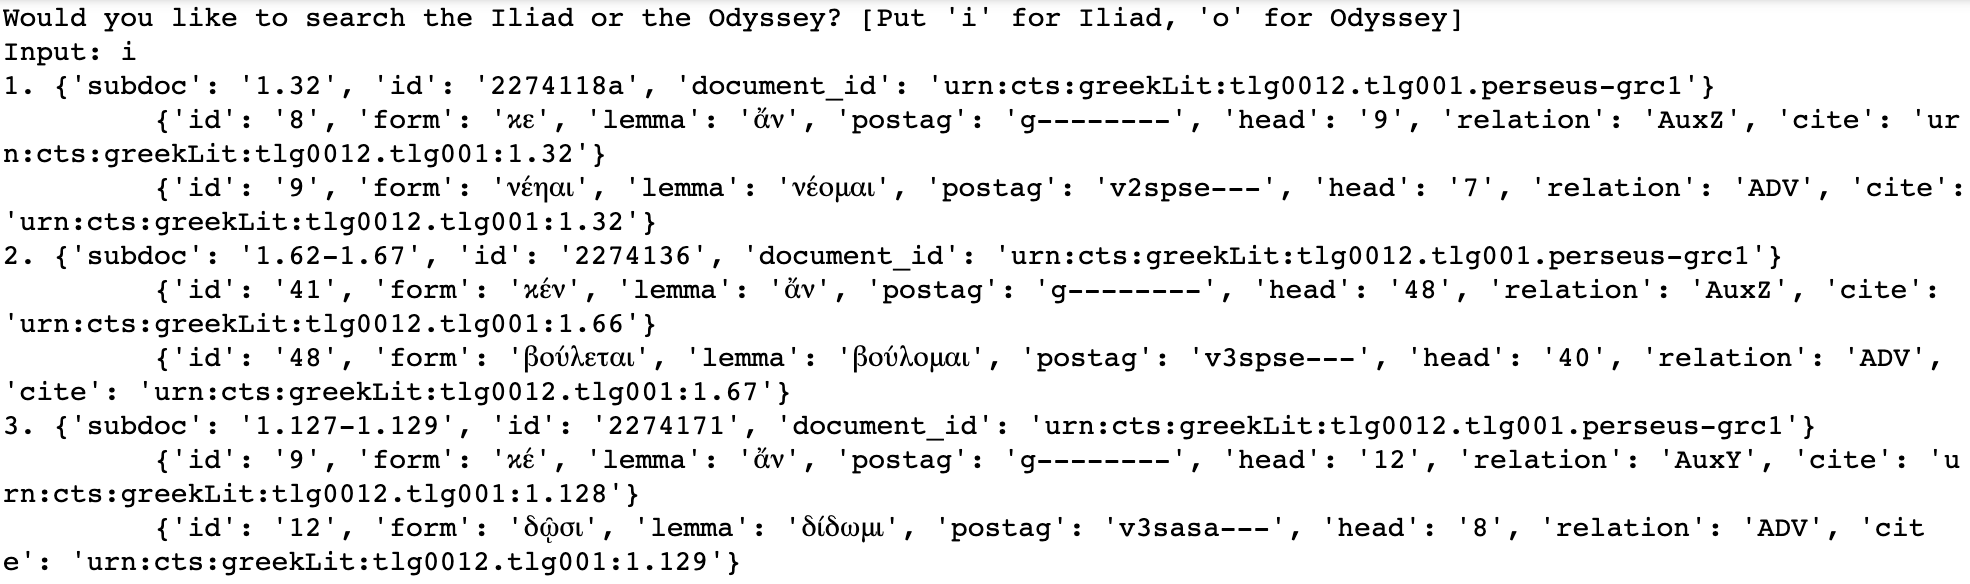

In [86]:
import xml.etree.ElementTree as ET
import os

ILIAD      = "tlg0012.tlg001.perseus-grc1.tb.xml"
ODYSSEY    = "tlg0012.tlg002.perseus-grc1.tb.xml"

print("Would you like to search the Iliad or the Odyssey? [Put 'i' for Iliad, 'o' for Odyssey]")

FILENAME = ''
while (FILENAME == ''):
    work = input("Input: ")
    if (work == 'i' or work == 'I' or work == '1' or work == 'Il' or work == 'Iliad'):
        FILENAME = ILIAD
        il_od = 'i'
    elif (work == 'o' or work == 'O' or work == '2' or work == 'Od' or work == "Odyssey"):
        FILENAME = ODYSSEY
        il_od = 'o'
    else:
        print("Your input cannot be recognized! Try ['i' for Iliad or 'o' for Odyssey].")

LOCALPATH  = os.path.join(LOCALROOT, 'gAGDT', 'data', 'xml', FILENAME)
tree = ET.parse(LOCALPATH)
root = tree.getroot()

count   = 1    #sets counter keeping track of query results
targid  = -10  #in case the code encounters a subjunctive first
modhead = -20  #in case the code encounters an ἄν first

moods   = {'indicative':'i','subjunctive':'s', 'optative':'o','imperative':'m','participle':'p',
           'infinitive':'n', 'verbal_adjective':'g','uncertain':'x'}

# change these variables to test out different moods and modifiers
MODLEMMA = 'ἄν'
TARGMOOD = 'subjunctive'

for sentence in root.findall('.//sentence'):
    for word in sentence.findall('./word'):
        if 'postag' in word.attrib:
            postag = word.get('postag')
            mood   = postag[4] #narrows down to verb mood
            lemma  = word.get('lemma')
            if lemma == MODLEMMA:
                modhead = word.get('head')
                modword = word.attrib
            elif mood == moods[TARGMOOD]: 
                targid = word.get('id')
                targword = word.attrib
                if modhead == targid: #checks if ἄν modifies subjunctive
                    print(str(count) + '.', sentence.attrib)
                    print('\t', modword)
                    print('\t', targword)

                    count += 1
    targid = -10  
    modhead = -20

Would you like to search the Iliad or the Odyssey? [Put 'i' for Iliad, 'o' for Odyssey]
Input: i
1. {'subdoc': '1.32', 'id': '2274118a', 'document_id': 'urn:cts:greekLit:tlg0012.tlg001.perseus-grc1'}
	 {'id': '8', 'form': 'κε', 'lemma': 'ἄν', 'postag': 'g--------', 'head': '9', 'relation': 'AuxZ', 'cite': 'urn:cts:greekLit:tlg0012.tlg001:1.32'}
	 {'id': '9', 'form': 'νέηαι', 'lemma': 'νέομαι', 'postag': 'v2spse---', 'head': '7', 'relation': 'ADV', 'cite': 'urn:cts:greekLit:tlg0012.tlg001:1.32'}
2. {'subdoc': '1.62-1.67', 'id': '2274136', 'document_id': 'urn:cts:greekLit:tlg0012.tlg001.perseus-grc1'}
	 {'id': '41', 'form': 'κέν', 'lemma': 'ἄν', 'postag': 'g--------', 'head': '48', 'relation': 'AuxZ', 'cite': 'urn:cts:greekLit:tlg0012.tlg001:1.66'}
	 {'id': '48', 'form': 'βούλεται', 'lemma': 'βούλομαι', 'postag': 'v3spse---', 'head': '40', 'relation': 'ADV', 'cite': 'urn:cts:greekLit:tlg0012.tlg001:1.67'}
3. {'subdoc': '1.127-1.129', 'id': '2274171', 'document_id': 'urn:cts:greekLit:tlg0

## Sentence Alignment

### Alignment Functions

Below are the functions `printEngSent`, `printGrkSent`, and `printGrkSent2`, which are used to align Ancient Greek sentences to English sentences. 
* `printEngSent` looks at A.T. Murray's English translations of the Iliad and the Odyssey and print these aligned English sentences underneath the actual Greek.
* `printGrkSent` and `printGrkSent2` both look at the Greek and print the Greek sentences above the aligned English translations. Given information about specific words in the sentences, these functions print out Greek sentences with highlighted forms. 
    * `printGrkSent` returns a sentence with one highlighted form (useful for finding examples of vocabulary words)
    * `printGrkSent2` returns a sentence with two highlighted forms (useful for finding examples of a relationship between two words)
    
The reason why I rewrote `printEngSent` with `BeautifulSoup` is because `ElementTree` doesn't take well to embeddings within the text - it essentially stops printing any text as soon as another tag is found. This bug was causing incomplete English sentences to be printed, so I used `BeautifulSoup`, which does not have this issue when printing the text inside tags.

In [114]:
from bs4 import BeautifulSoup
import sys
import os

ILIAD_ENG     = os.path.join(LOCALROOT, 'Homerica', "atmurray.iliad-sentalign-mod.xml")
ODYSSEY_ENG   = os.path.join(LOCALROOT, 'Homerica', "atmurray.odyssey-sentalign-mod.xml")

with open(ILIAD_ENG, 'r', encoding="utf-8") as f:
    ILIAD = f.read()
    ILIAD_SOUP = BeautifulSoup(ILIAD, "xml")
with open(ODYSSEY_ENG, 'r', encoding="utf-8") as f:
    ODYSSEY = f.read()
    ODYSSEY_SOUP = BeautifulSoup(ODYSSEY, "xml")
    
def printEngSent(il_od, target):
    if (il_od == 'i'):
        for sentence in ILIAD_SOUP('s'):
            if sentence.has_attr('xml:id'):
                sentID = sentence['xml:id']
                if (target == sentID[4:11]):
                    sys.stdout.write(sentence.text)
    elif (il_od == 'o'):
        for sentence in ODYSSEY_SOUP('s'):
            if sentence.has_attr('xml:id'):
                sentID = sentence['xml:id']
                if (target == sentID[4:11]):
                    sys.stdout.write(sentence.text)

In [115]:
import xml.etree.ElementTree as ET

ILPATH = os.path.join(LOCALROOT, 'gAGDT', 'data', 'xml', "tlg0012.tlg001.perseus-grc1.tb.xml")
IlTree = ET.parse(ILPATH)
IlRoot = IlTree.getroot()

ODPATH = os.path.join(LOCALROOT, 'gAGDT', 'data', 'xml', "tlg0012.tlg002.perseus-grc1.tb.xml")
OdTree = ET.parse(ODPATH)
OdRoot = OdTree.getroot()

def printGrkSent(il_od, targetid, givenid):
    if (il_od == 'i'):
        Grkroot = IlRoot
    else:
        Grkroot = OdRoot
    for sentence in Grkroot.findall('.//sentence'): 
        sentid = sentence.get('id')
        if (sentid == targetid):
            for word in sentence.findall('./word'):
                wordid = word.get('id')
                form = word.get('form')
                lemma = word.get('lemma')
                postag = word.get('postag')
                if (postag != None):
                    if (wordid == givenid):

                        # comment out if converting to html
                                        #  bold        green               end
                        sys.stdout.write('\033[1m' + '\33[32m' + form + '\033[0m')
                        sys.stdout.write(" ")

                        # for html file conversion
                        '''
                        sys.stdout.write('' + form + '')
                        sys.stdout.write(" ")
                        '''

                        continue
                    sys.stdout.write(form)
                    sys.stdout.write(" ")

def printGrkSent2(il_od, targetid, firstid, secondid):
    if (il_od == 'i'):
        Grkroot = IlRoot
    else:
        Grkroot = OdRoot
    for sentence in Grkroot.findall('.//sentence'): 
        sentid = sentence.get('id')
        if (sentid == targetid):
            for word in sentence.findall('./word'):
                wordid = word.get('id')
                form = word.get('form')
                lemma = word.get('lemma')
                postag = word.get('postag')
                if (postag != None):
                    if (wordid == firstid or wordid == secondid):

                        # comment out if converting to html
                                        #  bold        green               end
                        sys.stdout.write('\033[1m' + '\33[32m' + form + '\033[0m')
                        sys.stdout.write(" ")

                        # for html file conversion
                        '''
                        sys.stdout.write('' + form + '')
                        sys.stdout.write(" ")
                        '''
                        
                        continue
                    sys.stdout.write(form)
                    sys.stdout.write(" ")

### Sentence Alignment for Subjunctive + ἄν

I've applied these sentence alignment functions to the earlier script examining ἄν modified subjunctives, and this output shows how `printGrkSent2` is able to highlight both the ἄν and the subjunctive being modified by it. 

This script also accounts for subjunctives that are not modified by ἄν and provides:
* a total count for ἄν modified subjunctives
* a total count for subjunctives NOT modified by ἄν
* a total count for all subjunctives

Each subjunctive example is also labeled with "(not modified)" and "(modified)" to differentiate.

I also wrote some code that is currently commented out, but when uncommented, it becomes possible to export these alignments into HTML tables for easy conversions into other mediums (for example, importing alignments into Excel or Sheets).

Both `MODLEMMA` and `TARGMOOD` can be changed as needed. 

Currently, `MODLEMMA` (modifier lemma) is set to "ἄν" and `TARGMOOD` (target mood) is set to "subjunctive."

Note: Inconsistencies/Errors in the data may impact how the output looks. For example, in the below sample output, ἂν is encoded to be modifying ὁππότ', so ἡβήσῃ is marked as "(not modified)".

Sample Output:

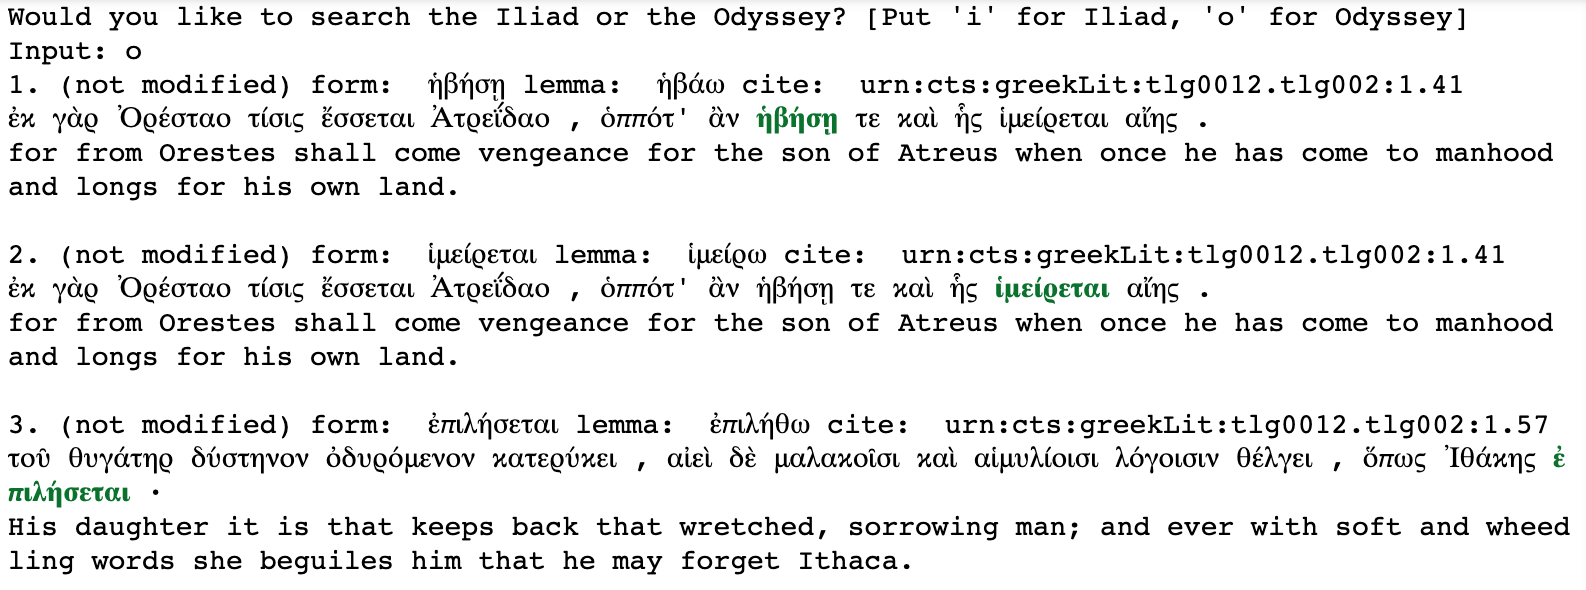

In [118]:
ILIAD      = "tlg0012.tlg001.perseus-grc1.tb.xml"
ODYSSEY    = "tlg0012.tlg002.perseus-grc1.tb.xml"

print("Would you like to search the Iliad or the Odyssey? [Put 'i' for Iliad, 'o' for Odyssey]")

FILENAME = ''
while (FILENAME == ''):
    work = input("Input: ")
    if (work == 'i' or work == 'I' or work == '1' or work == 'Il' or work == 'Iliad'):
        FILENAME = ILIAD
        il_od = 'i'
    elif (work == 'o' or work == 'O' or work == '2' or work == 'Od' or work == "Odyssey"):
        FILENAME = ODYSSEY
        il_od = 'o'
    else:
        print("Your input cannot be recognized! Try ['i' for Iliad or 'o' for Odyssey].")

LOCALPATH  = os.path.join(LOCALROOT, 'gAGDT', 'data', 'xml', FILENAME)
tree = ET.parse(LOCALPATH)
root = tree.getroot()

totalCount  = 1
modCount    = 1
unmodCount  = 1

targid  = -10       # in case the code encounters a subjunctive first
modhead = -20       # in case the code encounters an ἄν first
modid   = -30

moods   = {'indicative':'i','subjunctive':'s', 'optative':'o','imperative':'m','participle':'p',
           'infinitive':'n', 'verbal_adjective':'g','uncertain':'x'}

# change these variables to test out different moods and modifiers
MODLEMMA = 'ἄν'
TARGMOOD = 'optative'

# for html file conversion
# sys.stdout.write("<table>" + "\n")

for sentence in root.findall('.//sentence'):
    sentid = sentence.get('id')
    for word in sentence.findall('./word'):
        if 'postag' in word.attrib:
            postag = word.get('postag')
            mood = postag[4]
            form = word.get('form')
            cite = word.get('cite')
            lemma = word.get('lemma')
            if lemma == MODLEMMA:
                modhead = word.get('head')
                modid = word.get('id')
            else:
                targid = word.get('id')
                if (mood == moods[TARGMOOD]):
                    # moods that ARE modified
                    if modhead == targid: 

                        # comment out if converting to html
                        #'''
                        print(str(totalCount) + '.', "(modified)", \
                              "form: ", form, "lemma: ", lemma, "cite: ", cite)
                        printGrkSent2(il_od, sentid, targid, modid)
                        print('')
                        printEngSent(il_od, sentid)
                        print('')
                        print('')
                        totalCount += 1
                        modCount   += 1
                        
                        targid  = -10  
                        modhead = -20
                        modid   = -30
                        #'''
                        
                        # for html file conversion
                        '''
                        sys.stdout.write("\t" + "<tr>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>" + form + "</td>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>" + lemma + "</td>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>" + cite + "</td>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>")
                        printGrkSent2(il_od, sentid, targid, modid)
                        sys.stdout.write("</td>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>")
                        printEngSent(il_od, sentid)
                        sys.stdout.write("\t" + "\t" + "</td>" + "\n")
                        sys.stdout.write("\t" + "</tr>" + "\n")
                        '''
                    
                    # moods that are NOT modified
                    
                    else:

                        # comment out if converting to html
                        print(str(totalCount) + ".", "(not modified)", \
                              "form: ", form, "lemma: ", lemma, "cite: ", cite)
                        printGrkSent(il_od, sentid, targid)
                        print('')
                        printEngSent(il_od, sentid)
                        print('')
                        print('')

                        totalCount   += 1
                        unmodCount   += 1
                        
                        #targid  = -10  
                        #modhead = -20
                        #modid   = -30
                        
                        # for html file conversion
                        '''
                        sys.stdout.write("\t" + "<tr>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>" + form + "</td>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>" + lemma + "</td>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>" + cite + "</td>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>")
                        printGrkSent(il_od, sentid, targid)
                        sys.stdout.write("</td>" + "\n")
                        sys.stdout.write("\t" + "\t" + "<td>")
                        printEngSent(il_od, sentid)
                        sys.stdout.write("\t" + "\t" + "</td>" + "\n")
                        sys.stdout.write("\t" + "</tr>" + "\n")
                        '''
    targid  = -10  
    modhead = -20
    modid   = -30
print('Total Modified Moods: ', modCount - 1)
print('Total Moods Without Modification: ', unmodCount - 1)
print('Total Moods: ', totalCount - 2)

# for html file conversion
# sys.stdout.write("</table>")

Would you like to search the Iliad or the Odyssey? [Put 'i' for Iliad, 'o' for Odyssey]
Input: o
1. (not modified) form:  ἀπόλοιτο lemma:  ἀπόλλυμι cite:  urn:cts:greekLit:tlg0012.tlg002:1.47
ὡς ἀπόλοιτο καὶ ἄλλος , ὅτις τοιαῦτά γε ῥέζοι · 
so, too, may any other also be destroyed who does such deeds.

2. (not modified) form:  ῥέζοι lemma:  ῥέζω cite:  urn:cts:greekLit:tlg0012.tlg002:1.47
ὡς ἀπόλοιτο καὶ ἄλλος , ὅτις τοιαῦτά γε ῥέζοι · 
so, too, may any other also be destroyed who does such deeds.

3. (modified) form:  λαθοίμην lemma:  λανθάνω cite:  urn:cts:greekLit:tlg0012.tlg002:1.65
πῶς ἂν ἔπειτ' Ὀδυσῆος ἐγὼ θείοιο λαθοίμην , ὃς περὶ μὲν νόον ἐστὶ βροτῶν , περὶ δ' ἱρὰ θεοῖσιν ἀθανάτοισιν ἔδωκε , τοὶ οὐρανὸν εὐρὺν ἔχουσιν ; 
How should I, then, forget godlike Odysseus, who is beyond all mortals in wisdom, and beyond all has paid sacrifice to the immortal gods, who hold broad heaven?

4. (not modified) form:  θείη lemma:  τίθημι cite:  urn:cts:greekLit:tlg0012.tlg002:1.116
τὴν δὲ πολ

If so be you shall hear that your father is alive and coming home, then truly, though you are sore afflicted, you couldst endure for yet a year.

21. (modified) form:  ὄλοισθε lemma:  ὄλλυμι cite:  urn:cts:greekLit:tlg0012.tlg002:1.380
νήποινοί κεν ἔπειτα δόμων ἔντοσθεν ὄλοισθε . " 
Without atonement, then, should you perish within my halls.

22. (not modified) form:  ποιήσειεν lemma:  ποιέω cite:  urn:cts:greekLit:tlg0012.tlg002:1.387
μὴ σέ γ' ἐν ἀμφιάλῳ Ἰθάκῃ βασιλῆα Κρονίων ποιήσειεν , ὅ τοι γενεῇ πατρώιόν ἐστιν . " 
May the son of Cronos never make you king in sea-girt Ithaca, which thing is by birth your heritage.

23. (modified) form:  ἐθέλοιμι lemma:  ἐθέλω cite:  urn:cts:greekLit:tlg0012.tlg002:1.390
καὶ κεν τοῦτ' ἐθέλοιμι Διός γε διδόντος ἀρέσθαι . 
Even this should I be glad to accept from the hand of Zeus.

24. (not modified) form:  ἔχοις lemma:  ἔχω cite:  urn:cts:greekLit:tlg0012.tlg002:1.402
κτήματα δ' αὐτὸς ἔχοις καὶ δώμασιν οἷσιν ἀνάσσοις . 
but as for your possessions,

' ὦ Κίρκη , τίς γάρ κεν ἀνήρ , ὃς ἐναίσιμος εἴη , πρὶν τλαίη πάσσασθαι ἐδητύος ἠδὲ ποτῆτος , πρὶν λύσασθ' ἑτάρους καὶ ἐν ὀφθαλμοῖσιν ἰδέσθαι ; 
Circe, what man that is right-minded could bring himself to taste of food or drink,  before yet he had won freedom for his comrades, and beheld them before his face?

46. (not modified) form:  ἱκοίατο lemma:  ἱκνέομαι cite:  urn:cts:greekLit:tlg0012.tlg002:10.416
δόκησε δ' ἄρα σφίσι θυμὸς ὣς ἔμεν , ὡς εἰ πατρίδ' ἱκοίατο καὶ πόλιν αὐτὴν τρηχείης Ἰθάκης , ἵνα τ' ἔτραφεν ἠδ' ἐγένοντο . 
and it seemed to their hearts as though they had got to their native land, and the very city of rugged Ithaca, where they were bred and born.

47. (not modified) form:  ἀφικοίμεθα lemma:  ἀφικνέομαι cite:  urn:cts:greekLit:tlg0012.tlg002:10.420
" ' σοὶ μὲν νοστήσαντι , διοτρεφές , ὣς ἐχάρημεν , ὡς εἴ τ' εἰς Ἰθάκην ἀφικοίμεθα πατρίδα γαῖαν · 
At your return, O you fostered of Zeus, we are as glad  as though we had returned to Ithaca, our native land.

48. (modified)

Truly I could remain until bright dawn, so you would be willing to tell in the hall of these woes of your.

67. (modified) form:  φθονέοιμι lemma:  φθονέω cite:  urn:cts:greekLit:tlg0012.tlg002:11.381
εἰ δ' ἔτ' ἀκουέμεναί γε λιλαίεαι , οὐκ ἂν ἐγώ γε τούτων σοι φθονέοιμι καὶ οἰκτρότερ' ἄλλ' ἀγορεύειν , κήδε' ἐμῶν ἑτάρων , οἳ δὴ μετόπισθεν ὄλοντο , οἳ Τρώων μὲν ὑπεξέφυγον στονόεσσαν ἀυτήν , ἐν νόστῳ δ' ἀπόλοντο κακῆς ἰότητι γυναικός . 
But if you are fain still to listen, I would not begrudge to tell you of other things more pitiful still than these, even the woes of my comrades, who perished afterward, who escaped from the dread battle-cry of the Trojans, but perished on their return through the will of an evil woman.

68. (not modified) form:  εἴποι lemma:  εἶπον cite:  urn:cts:greekLit:tlg0012.tlg002:11.480
' ὦ Ἀχιλεῦ Πηλῆος υἱέ , μέγα φέρτατ' Ἀχαιῶν , ἦλθον Τειρεσίαο κατὰ χρέος , εἴ τινα βουλὴν εἴποι , ὅπως Ἰθάκην ἐς παιπαλόεσσαν ἱκοίμην · 
Achilles, son of Peleus, far the mightiest 

Come, I pray you, goddess, tell me this thing truly, if in any way I might escape from fell Charybids, and ward off that other, when she works harm to my comrades.

93. (modified) form:  ἀμυναίμην lemma:  ἀμύνω cite:  urn:cts:greekLit:tlg0012.tlg002:12.114
εἰ δ' ἄγε δή μοι τοῦτο , θεά , νημερτὲς ἐνίσπες , εἴ πως τὴν ὀλοὴν μὲν ὑπεκπροφύγοιμι Χάρυβδιν , τὴν δέ κ' ἀμυναίμην , ὅτε μοι σίνοιτό γ' ἑταίρους . 
Come, I pray you, goddess, tell me this thing truly, if in any way I might escape from fell Charybids, and ward off that other, when she works harm to my comrades.

94. (not modified) form:  σίνοιτό lemma:  σίνομαι cite:  urn:cts:greekLit:tlg0012.tlg002:12.114
εἰ δ' ἄγε δή μοι τοῦτο , θεά , νημερτὲς ἐνίσπες , εἴ πως τὴν ὀλοὴν μὲν ὑπεκπροφύγοιμι Χάρυβδιν , τὴν δέ κ' ἀμυναίμην , ὅτε μοι σίνοιτό γ' ἑταίρους . 
Come, I pray you, goddess, tell me this thing truly, if in any way I might escape from fell Charybids, and ward off that other, when she works harm to my comrades.

95. (modified) fo

For now all that my heart desired has been brought to pass: a passage, and gifts of friendship.

115. (not modified) form:  εὕροιμι lemma:  εὑρίσκω cite:  urn:cts:greekLit:tlg0012.tlg002:13.43
ἀμύμονα δ' οἴκοι ἄκοιτιν νοστήσας εὕροιμι σὺν ἀρτεμέεσσι φίλοισιν . 
May the gods of heaven bless them to me, and on my return may I find in my home my peerless wife with those I love unscathed;

116. (not modified) form:  ἐϋφραίνοιτε lemma:  εὐφραίνω cite:  urn:cts:greekLit:tlg0012.tlg002:13.44
ὑμεῖς δ' αὖθι μένοντες ἐϋφραίνοιτε γυναῖκας κουριδίας καὶ τέκνα · 
and may you again, remaining here, make glad  your wedded wives and children;

117. (not modified) form:  ὀπάσειαν lemma:  ὀπάζω cite:  urn:cts:greekLit:tlg0012.tlg002:13.45
θεοὶ δ' ἀρετὴν ὀπάσειαν παντοίην , καὶ μή τι κακὸν μεταδήμιον εἴη . " 
and may the gods grant you prosperity of every sort, and may no evil come upon your people.

118. (not modified) form:  εἴη lemma:  εἰμί cite:  urn:cts:greekLit:tlg0012.tlg002:13.46
θεοὶ δ' ἀρετὴν ὀ

who went to spacious Lacedaemon to the house of Menelaus,  to seek tidings of you, if you were still anywhere alive.

137. (not modified) form:  ἄροιτο lemma:  αἴρω cite:  urn:cts:greekLit:tlg0012.tlg002:13.422
αὐτή μιν πόμπευον , ἵνα κλέος ἐσθλὸν ἄροιτο κεῖσ' ἐλθών · 
It was I that guided him, that he might win good report by going there,

138. (not modified) form:  κορεσαίατο lemma:  κορέννυμι cite:  urn:cts:greekLit:tlg0012.tlg002:14.28
τὸν δὲ τέταρτον ἀποπροέηκε πόλινδε σῦν ἀγέμεν μνηστῆρσιν ὑπερφιάλοισιν ἀνάγκῃ , ὄφρ' ἱερεύσαντες κρειῶν κορεσαίατο θυμόν . 
and the fourth he had sent to the city to drive of necessity a boar to the insolent suitors, that they might kill it and satisfy their souls with meat.

139. (not modified) form:  δοίη lemma:  δίδωμι cite:  urn:cts:greekLit:tlg0012.tlg002:14.53
" Ζεύς τοι δοίη , ξεῖνε , καὶ ἀθάνατοι θεοὶ ἄλλοι ὅττι μάλιστ' ἐθέλεις , ὅτι με πρόφρων ὑπέδεξο . " 
Stranger, may Zeus and the other immortal gods grant you what most you desire, since y

But Odysseus, he said, had gone to Dodona, to hear the will of Zeus from the high-crested oak of the god, even how he might return to the rich land of Ithaca
 after so long an absence, whether openly or in secret.

160. (not modified) form:  γενοίμην lemma:  γίγνομαι cite:  urn:cts:greekLit:tlg0012.tlg002:14.338
τοῖσιν δὲ κακὴ φρεσὶν ἥνδανε βουλὴ ἀμφ' ἐμοί , ὄφρ' ἔτι πάγχυ δύης ἐπὶ πῆμα γενοίμην . 
But an evil counsel regarding me found favour in their hearts, that I might even yet be brought into utter misery.

161. (modified) form:  εἴη lemma:  εἰμί cite:  urn:cts:greekLit:tlg0012.tlg002:14.403
" ξεῖν' , οὕτω γάρ κέν μοι ἐϋκλείη τ' ἀρετή τε εἴη ἐπ' ἀνθρώπους ἅμα τ' αὐτίκα καὶ μετέπειτα , ὅς σ' ἐπεὶ ἐς κλισίην ἄγαγον καὶ ξείνια δῶκα , αὖτις δὲ κτείναιμι φίλον τ' ἀπὸ θυμὸν ἑλοίμην · 
Aye, stranger, so should I indeed win fair fame and prosperity among men both now and afterwards, if I, who brought you to my hut and gave you entertainment,  should then kill you, and take away your dear 

then will I even there ever pray to you, as to a god.

186. (modified) form:  τελέσειας lemma:  τελέω cite:  urn:cts:greekLit:tlg0012.tlg002:15.195
" Νεστορίδη , πῶς κέν μοι ὑποσχόμενος τελέσειας μῦθον ἐμόν ; 
Son of Nestor, will you now make me a promise, and fulfil it, as I command?

187. (not modified) form:  τελέσειεν lemma:  τελέω cite:  urn:cts:greekLit:tlg0012.tlg002:15.203
" ὣς φάτο , Νεστορίδης δ' ἄρ' ἑῷ συμφράσσατο θυμῷ , ὅππως οἱ κατὰ μοῖραν ὑποσχόμενος τελέσειεν . 
So he spoke, and the son of Nestor took counsel with his heart, how he might duly give the promise and fulfil it.

188. (not modified) form:  μετείη lemma:  μέτειμι cite:  urn:cts:greekLit:tlg0012.tlg002:15.251
ἀλλ' ἦ τοι Κλεῖτον χρυσόθρονος ἥρπασεν Ἠὼς κάλλεος εἵνεκα οἷο , ἵν' ἀθανάτοισι μετείη · 
Now Cleitus golden-throned Dawn snatched away by reason of his beauty, that he might dwell with the immortals;

189. (not modified) form:  ἀνύσειε lemma:  ἀνύω cite:  urn:cts:greekLit:tlg0012.tlg002:15.294
τοῖσιν δ' ἴκ

Him would I bring on board, and he would fetch you a vast price, wherever you might take him for sale among men of strange speech.

211. (not modified) form:  ἀγγείλειε lemma:  ἀγγέλλω cite:  urn:cts:greekLit:tlg0012.tlg002:15.458
ἀλλ' ὅτε δὴ κοίλη νηῦς ἤχθετο τοῖσι νέεσθαι , καὶ τότ' ἄρ' ἄγγελον ἧκαν , ὃς ἀγγείλειε γυναικί . 
But when their hollow ship was laden for their return, then they sent a messenger to bear tidings to the woman.

212. (modified) form:  παραθείμην lemma:  παρατίθημι cite:  urn:cts:greekLit:tlg0012.tlg002:15.506
ἠῶθεν δέ κεν ὔμμιν ὁδοιπόριον παραθείμην , δαῖτ' ἀγαθὴν κρειῶν τε καὶ οἴνου ἡδυπότοιο . " 
And in the morning I will set before you, as wages for your journey, a good feast of flesh and sweet wine.

213. (modified) form:  κελοίμην lemma:  κέλομαι cite:  urn:cts:greekLit:tlg0012.tlg002:15.513
" ἄλλως μέν σ' ἂν ἐγώ γε καὶ ἡμέτερόνδε κελοίμην ἔρχεσθ' · 
Were things otherwise, I should command you go even to our house,

214. (modified) form:  ἵκοιο lemma:  ἱκ

But for us two alone  leave behind two swords and two spears, and two ox-hide shields for us to grasp, that we may rush upon them and seize them;

233. (modified) form:  πειρηθεῖμεν lemma:  πειράω cite:  urn:cts:greekLit:tlg0012.tlg002:16.305
καί κέ τεο δμώων ἀνδρῶν ἔτι πειρηθεῖμεν , ἠμὲν ὅπου τις νῶϊ τίει καὶ δείδιε θυμῷ , ἠδ' ὅτις οὐκ ἀλέγει , σὲ δ' ἀτιμᾷ τοῖον ἐόντα . " 
Aye, and we will likewise make trial of many a one of the serving men, and see where any of them honours us two and fears us at heart, and who does not think of us and scorns you, a man so goodly.

234. (modified) form:  ἐθέλοιμι lemma:  ἐθέλω cite:  urn:cts:greekLit:tlg0012.tlg002:16.318
ἀνδρῶν δ' οὐκ ἂν ἐγώ γε κατὰ σταθμοὺς ἐθέλοιμι ἡμέας πειράζειν , ἀλλ' ὕστερα ταῦτα πένεσθαι , εἰ ἐτεόν γέ τι οἶσθα Διὸς τέρας αἰγιόχοιο . " 
But of the men in the farmsteads I would not that we should make trial, but that we should deal therewith afterwards,  if in very truth you know some sign from Zeus who bears the aegis.

235. 

If you would give me this man to keep my farmstead, to sweep out the pens and to carry young shoots to the kids,  then by drinking whey he might get himself a sturdy thigh.

256. (not modified) form:  ἕλοιτο lemma:  αἱρέω cite:  urn:cts:greekLit:tlg0012.tlg002:17.236
ὁ δὲ μερμήριξεν Ὀδυσσεὺς ἠὲ μεταΐξας ῥοπάλῳ ἐκ θυμὸν ἕλοιτο , ἦ πρὸς γῆν ἐλάσειε κάρη ἀμφουδὶς ἀείρας . 
And Odysseus pondered whether he should leap upon him and take his life with his staff, or seize him round about,2 and lift him up, and dash his head upon the ground.

257. (not modified) form:  ἐλάσειε lemma:  ἐλαύνω cite:  urn:cts:greekLit:tlg0012.tlg002:17.237
ὁ δὲ μερμήριξεν Ὀδυσσεὺς ἠὲ μεταΐξας ῥοπάλῳ ἐκ θυμὸν ἕλοιτο , ἦ πρὸς γῆν ἐλάσειε κάρη ἀμφουδὶς ἀείρας . 
And Odysseus pondered whether he should leap upon him and take his life with his staff, or seize him round about,2 and lift him up, and dash his head upon the ground.

258. (not modified) form:  ἔλθοι lemma:  ἔρχομαι cite:  urn:cts:greekLit:tlg0012.tlg002:17

For I too once dwelled in a house of my own among men,  a rich man in a wealthy house, and full often I gave gifts to a wanderer, whoever he was and with whatsoever need he came.

280. (not modified) form:  ἔλθοι lemma:  ἔρχομαι cite:  urn:cts:greekLit:tlg0012.tlg002:17.421
καὶ γὰρ ἐγώ ποτε οἶκον ἐν ἀνθρώποισιν ἔναιον ὄλβιος ἀφνειὸν καὶ πολλάκι δόσκον ἀλήτῃ , τοίῳ ὁποῖος ἔοι καὶ ὅτευ κεχρημένος ἔλθοι · 
For I too once dwelled in a house of my own among men,  a rich man in a wealthy house, and full often I gave gifts to a wanderer, whoever he was and with whatsoever need he came.

281. (not modified) form:  ἀπολοίμην lemma:  ἀπόλλυμι cite:  urn:cts:greekLit:tlg0012.tlg002:17.426
ἀλλὰ Ζεὺς ἀλάπαξε Κρονίων - ἤθελε γάρ που - ὅς μ' ἅμα ληϊστῆρσι πολυπλάγκτοισιν ἀνῆκεν Αἴγυπτόνδ' ἰέναι , δολιχὴν ὁδόν , ὄφρ' ἀπολοίμην . 
But Zeus, son of Cronos, brought all to nothing—so, I believe, was his good pleasure—  who sent me forth with roaming pirates to go to Egypt, a far voyage, that I might meet 

Then the much-enduring, brilliant Odysseus was divided in mind whether he should strike him so that life should leave him even there as he fell, or whether he should deal him a light blow and stretch him on the earth.

307. (not modified) form:  ἐπιφρασσαίατ' lemma:  ἐπιφράζω cite:  urn:cts:greekLit:tlg0012.tlg002:18.94
ὧδε δέ οἱ φρονέοντι δοάσσατο κέρδιον εἶναι , ἦκ' ἐλάσαι , ἵνα μή μιν ἐπιφρασσαίατ' Ἀχαιοί . 
And, as he pondered, this seemed to him the better course, to deal him a light blow, that the Achaeans might not take note of him.

308. (not modified) form:  δοίη lemma:  δίδωμι cite:  urn:cts:greekLit:tlg0012.tlg002:18.112
" Ζεύς τοι δοίη , ξεῖνε , καὶ ἀθάνατοι θεοὶ ἄλλοι , ὅττι μάλιστ' ἐθέλεις καί τοι φίλον ἔπλετο θυμῷ , ὃς τοῦτον τὸν ἄναλτον ἀλητεύειν ἀπέπαυσας ἐν δήμῳ · 
May Zeus grant you, stranger, and the other immortal gods what you desire most, and the dearest wish of your heart, seeing that you have made this insatiable man to cease from begging  in the land.

309. (n

Stranger, would you have a mind to serve for hire, if I should take you into service on an outlying farm—your pay shall be assured you—gathering stones for walls, and planting tall trees?

330. (not modified) form:  ἀνελοίμην lemma:  ἀναιρέω cite:  urn:cts:greekLit:tlg0012.tlg002:18.357
" ξεῖν' , ἦ ἄρ κ' ἐθέλοις θητευέμεν , εἴ σ' ἀνελοίμην , ἀγροῦ ἐπ' ἐσχατιῆς - μισθὸς δέ τοι ἄρκιος ἔσται - αἱμασιάς τε λέγων καὶ δένδρεα μακρὰ φυτεύων ; 
Stranger, would you have a mind to serve for hire, if I should take you into service on an outlying farm—your pay shall be assured you—gathering stones for walls, and planting tall trees?

331. (not modified) form:  παρέχοιμι lemma:  παρέχω cite:  urn:cts:greekLit:tlg0012.tlg002:18.360
ἔνθα κ' ἐγὼ σῖτον μὲν ἐπηετανὸν παρέχοιμι , εἵματα δ' ἀμφιέσαιμι ποσίν θ' ὑποδήματα δοίην . 
There would I provide you with food the year through, and clothe you with clothing and give you sandals for your feet.

332. (not modified) form:  ἀμφιέσαιμι lemma:  ἀμφιάζω cite:

Or I would again that this day the son of Cronos might bring war upon us from whence he would, and I had a shield and two spears and a helmet all of bronze, that fitted well my temples: then should you see me mingling among the foremost fighters,  and would not prate, taunting me with this belly of mine.

348. (not modified) form:  ἔλθοι lemma:  ἔρχομαι cite:  urn:cts:greekLit:tlg0012.tlg002:18.384
εἰ δ' Ὀδυσεὺς ἔλθοι καὶ ἵκοιτ' ἐς πατρίδα γαῖαν , αἶψά κέ τοι τὰ θύρετρα , καὶ εὐρέα περ μάλ' ἐόντα , φεύγοντι στείνοιτο διὲκ προθύροιο θύραζε . " 
If but Odysseus might return, and come to his native land,  soon would yonder doors, right wide though they are, prove all too narrow for you in your flight out through the doorway.

349. (not modified) form:  ἵκοιτ' lemma:  ἱκνέομαι cite:  urn:cts:greekLit:tlg0012.tlg002:18.384
εἰ δ' Ὀδυσεὺς ἔλθοι καὶ ἵκοιτ' ἐς πατρίδα γαῖαν , αἶψά κέ τοι τὰ θύρετρα , καὶ εὐρέα περ μάλ' ἐόντα , φεύγοντι στείνοιτο διὲκ προθύροιο θύραζε . " 
If but Odysseus might 

 for he at once had a foreboding at heart that, as she touched him, she might note a scar, and the truth be made manifest.

372. (not modified) form:  γένοιτο lemma:  γίγνομαι cite:  urn:cts:greekLit:tlg0012.tlg002:19.391
αὐτίκα γὰρ κατὰ θυμὸν ὀΐσατο , μή ἑ λαβοῦσα οὐλὴν ἀμφράσσαιτο καὶ ἀμφαδὰ ἔργα γένοιτο . 
 for he at once had a foreboding at heart that, as she touched him, she might note a scar, and the truth be made manifest.

373. (not modified) form:  πόροι lemma:  πόρω cite:  urn:cts:greekLit:tlg0012.tlg002:19.413
τῶν ἕνεκ' ἦλθ' Ὀδυσεύς , ἵνα οἱ πόροι ἀγλαὰ δῶρα . 
It was for this reason that Odysseus had come, that Autolycus might give him the glorious gifts.

374. (not modified) form:  πάθοι lemma:  πάσχω cite:  urn:cts:greekLit:tlg0012.tlg002:19.464
τῷ μέν ῥα πατὴρ καὶ πότνια μήτηρ χαῖρον νοστήσαντι καὶ ἐξερέεινον ἕκαστα , οὐλὴν ὅττι πάθοι · 
Then his father and his honored mother rejoiced at his return, and asked him all the story, how he got his wound;

375. (not modified) 

and would fain fasten reproach upon us!

396. (not modified) form:  παραθεῖτο lemma:  παρατίθημι cite:  urn:cts:greekLit:tlg0012.tlg002:2.105
ἔνθα καὶ ἠματίη μὲν ὑφαίνεσκεν μέγαν ἱστόν , νύκτας δ' ἀλλύεσκεν , ἐπεὶ δαΐδας παραθεῖτο . 
Then each and every day she would weave at the great web,  but by night would unravel it, when she had let place torches by her.

397. (modified) form:  ὄλοισθε lemma:  ὄλλυμι cite:  urn:cts:greekLit:tlg0012.tlg002:2.145
νήποινοί κεν ἔπειτα δόμων ἔντοσθεν ὄλοισθε . " 
Without atonement then should you perish within my halls.

398. (modified) form:  ἀνιείης lemma:  ἀνίημι cite:  urn:cts:greekLit:tlg0012.tlg002:2.185
οὐκ ἂν τόσσα θεοπροπέων ἀγόρευες , οὐ δέ κε Τηλέμαχον κεχολωμένον ὧδ' ἀνιείης , σῷ οἴκῳ δῶρον ποτιδέγμενος , αἴ κε πόρῃσιν . 
Then wouldst you not prate so much in your reading of signs,  or be urging Telemachus on in his wrath, hoping for some gift for your house, if by chance he shall give it.

399. (modified) form:  τλαίην lemma:  τλάω cite: 

if fifty troops of mortal men  should stand about us, eager to kill us in battle, even their cattle and brilliant sheep should you drive off.

417. (modified) form:  ἐλάσαιο lemma:  ἐλαύνω cite:  urn:cts:greekLit:tlg0012.tlg002:20.51
εἴ περ πεντήκοντα λόχοι μερόπων ἀνθρώπων νῶϊ περισταῖεν , κτεῖναι μεμαῶτες Ἄρηϊ , καί κεν τῶν ἐλάσαιο βόας καὶ ἴφια μῆλα . 
if fifty troops of mortal men  should stand about us, eager to kill us in battle, even their cattle and brilliant sheep should you drive off.

418. (not modified) form:  ἕλοιο lemma:  αἱρέω cite:  urn:cts:greekLit:tlg0012.tlg002:20.62
" Ἄρτεμι , πότνα θεά , θύγατερ Διός , αἴθε μοι ἤδη ἰὸν ἐνὶ στήθεσσι βαλοῦσ' ἐκ θυμὸν ἕλοιο αὐτίκα νῦν , ἢ ἔπειτα μ' ἀναρπάξασα θύελλα οἴχοιτο προφέρουσα κατ' ἠερόεντα κέλευθα , ἐν προχοῇς δὲ βάλοι ἀψορρόου Ὠκεανοῖο . 
Artemis, mighty goddess, daughter of Zeus, would that now you would fix your arrow in my breast and take away my life even in this hour; or that a storm-wind might catch me up and bear me h

But to Telemachus and his mother I would speak a gentle word, if by chance it may find favour in the minds of both.

438. (not modified) form:  ἅδοι lemma:  ἁνδάνω cite:  urn:cts:greekLit:tlg0012.tlg002:20.327
Τηλεμάχῳ δέ κε μῦθον ἐγὼ καὶ μητέρι φαίην ἤπιον , εἴ σφωϊν κραδίῃ ἅδοι ἀμφοτέροιϊν . 
But to Telemachus and his mother I would speak a gentle word, if by chance it may find favour in the minds of both.

439. (not modified) form:  τελέσειεν lemma:  τελέω cite:  urn:cts:greekLit:tlg0012.tlg002:20.344
μὴ τοῦτο θεὸς τελέσειεν . " 
May God never bring such a thing to pass.

440. (not modified) form:  ὑπεκφύγοι lemma:  ὑπεκφεύγω cite:  urn:cts:greekLit:tlg0012.tlg002:20.368
τοῖς ἔξειμι θύραζε , ἐπεὶ νοέω κακὸν ὔμμιν ἐρχόμενον , τό κεν οὔ τις ὑπεκφύγοι οὐ δ' ἀλέαιτο μνηστήρων , οἳ δῶμα κάτ' ἀντιθέου Ὀδυσῆος ἀνέρας ὑβρίζοντες ἀτάσθαλα μηχανάασθε . " 
With these will I go forth out of doors, for I mark evil coming upon you which not one of the suitors may escape or avoid, of all you who i

and each man gazed about to see how he might escape utter destruction;

469. (not modified) form:  βασιλεύοι lemma:  βασιλεύω cite:  urn:cts:greekLit:tlg0012.tlg002:22.52
οὗτος γὰρ ἐπίηλεν τάδε ἔργα , οὔ τι γάμου τόσσον κεχρημένος οὐ δὲ χατίζων , ἀλλ' ἄλλα φρονέων , τά οἱ οὐκ ἐτέλεσσε Κρονίων , ὄφρ' Ἰθάκης κατὰ δῆμον ἐϋκτιμένης βασιλεύοι αὐτός , ἀτὰρ σὸν παῖδα κατακτείνειε λοχήσας . 
for it was he who set on foot these deeds,  not so much through desire or need of the marriage, but with another purpose, which the son of Cronos did not bring to pass for him, that in the land of settled Ithaca he might himself be king, and might lie in wait for your son and kill him.

470. (not modified) form:  κατακτείνειε lemma:  κατακτείνω cite:  urn:cts:greekLit:tlg0012.tlg002:22.53
οὗτος γὰρ ἐπίηλεν τάδε ἔργα , οὔ τι γάμου τόσσον κεχρημένος οὐ δὲ χατίζων , ἀλλ' ἄλλα φρονέων , τά οἱ οὐκ ἐτέλεσσε Κρονίων , ὄφρ' Ἰθάκης κατὰ δῆμον ἐϋκτιμένης βασιλεύοι αὐτός , ἀτὰρ σὸν παῖδα κατακτείνειε λοχήσας . 
for i

Aye, and Telemachus too will bear witness to this, your dear son, how that through no will or desire of mine I was accustomed to resort to your house to sing to the suitors at their feasts, but they, being far more and stronger, led me here of necessity.

490. (not modified) form:  ὑποκλοπέοιτο lemma:  ὑποκλοπέομαι cite:  urn:cts:greekLit:tlg0012.tlg002:22.382
πάπτηνεν δ' Ὀδυσεὺς καθ' ἑὸν δόμον , εἴ τις ἔτ' ἀνδρῶν ζωὸς ὑποκλοπέοιτο , ἀλύσκων κῆρα μέλαιναν . 
And Odysseus too gazed about all through his house to see if any man yet lived, and was hiding there, seeking to avoid black fate.

491. (not modified) form:  εἰσαφίκοιτο lemma:  εἰσαφικνέομαι cite:  urn:cts:greekLit:tlg0012.tlg002:22.415
οὔ τινα γὰρ τίεσκον ἐπιχθονίων ἀνθρώπων , οὐ κακὸν οὐ δὲ μὲν ἐσθλόν , ὅτις σφέας εἰσαφίκοιτο · 
for they honored no one of men upon the earth,  were he evil or good, whoever came among them;

492. (not modified) form:  ἑλοίμην lemma:  αἱρέω cite:  urn:cts:greekLit:tlg0012.tlg002:22.462
" μὴ μὲν δὴ

But when the great bow came to the hands of Odysseus, then we all cried out aloud not to give him the bow, how much soever he might speak;

517. (modified) form:  γοάοιεν lemma:  γοάω cite:  urn:cts:greekLit:tlg0012.tlg002:24.190
οὐ γάρ πω ἴσασι φίλοι κατὰ δώμαθ' ἑκάστου , οἵ κ' ἀπονίψαντες μέλανα βρότον ἐξ ὠτειλέων κατθέμενοι γοάοιεν · 
for our friends in each man's home know nothing as yet—our friends who might wash the black blood from our wounds  and lay our bodies out with wailing;

518. (not modified) form:  ἔλθοι lemma:  ἔρχομαι cite:  urn:cts:greekLit:tlg0012.tlg002:24.237
μερμήριξε δ' ἔπειτα κατὰ φρένα καὶ κατὰ θυμὸν κύσσαι καὶ περιφῦναι ἑὸν πατέρ' , ἠδὲ ἕκαστα εἰπεῖν , ὡς ἔλθοι καὶ ἵκοιτ' ἐς πατρίδα γαῖαν , ἦ πρῶτ' ἐξερέοιτο ἕκαστά τε πειρήσαιτο . 
Then he debated in mind and heart whether to kiss and embrace his father, and tell him all, how he had returned and come to his native land, or whether he should first question him, and prove him in each thing.

519. (not modified)

βούλετο γάρ ῥα λαὸν ἐρυκακέειν ῥέξαι θ' ἱερὰς ἑκατόμβας , ὡς τὸν Ἀθηναίης δεινὸν χόλον ἐξακέσαιτο , νήπιος , οὐ δὲ τὸ ᾔδη , ὃ οὐ πείσεσθαι ἔμελλεν · 
for he wanted to hold back the host and to offer holy hecatombs,  that he might appease the dread wrath of Athena,—fool! nor knew he this, that with her was to be no hearkening;

540. (not modified) form:  νεοίμεθα lemma:  νέομαι cite:  urn:cts:greekLit:tlg0012.tlg002:3.170
ὀψὲ δὲ δὴ μετὰ νῶι κίε ξανθὸς Μενέλαος , ἐν Λέσβῳ δ' ἔκιχεν δολιχὸν πλόον ὁρμαίνοντας , ἢ καθύπερθε Χίοιο νεοίμεθα παιπαλοέσσης , νήσου ἔπι Ψυρίης , αὐτὴν ἐπ' ἀριστέρ' ἔχοντες , ἦ ὑπένερθε Χίοιο , παρ' ἠνεμόεντα Μίμαντα . 
and late upon our track came fair-haired Menelaus, and overtook us in Lesbos, as we were debating the long voyage,  whether we should sail to sea-ward of rugged Chios, toward the isle Psyria, keeping Chios itself1 on our left, or to land-ward of Chios past windy Mimas.

541. (not modified) form:  φύγοιμεν lemma:  φεύγω cite:  urn:cts:greekLit:tlg0012

and the smith prepared it, and overlaid therewith the horns of the heifer, that the goddess might rejoice when she beheld the offering.

559. (modified) form:  τέκοιεν lemma:  τίκτω cite:  urn:cts:greekLit:tlg0012.tlg002:4.64
οὐ γὰρ σφῷν γε γένος ἀπόλωλε τοκήων , ἀλλ' ἀνδρῶν γένος ἐστὲ διοτρεφέων βασιλήων σκηπτούχων , ἐπεὶ οὔ κε κακοὶ τοιούσδε τέκοιεν . " 
for in you two the breed of your sires is not lost, but you are of the breed of men that are sceptred kings, fostered of Zeus; for base churls could not beget such sons as you.

560. (not modified) form:  πευθοίαθ' lemma:  πυνθάνομαι cite:  urn:cts:greekLit:tlg0012.tlg002:4.70
αὐτὰρ ἐπεὶ πόσιος καὶ ἐδητύος ἐξ ἔρον ἕντο , δὴ τότε Τηλέμαχος προσεφώνεε Νέστορος υἱόν , ἄγχι σχὼν κεφαλήν , ἵνα μὴ πευθοίαθ' οἱ ἄλλοι · 
But when they had put from them the desire of food and drink, lo, then Telemachus spoke to the son of Nestor,  holding his head close to him, that the others might not hear:

561. (modified) form:  ἐρίζοι lemma:  ἐρίζω cite:

But in this matter of which you do ask and beseech me, truly I will not swerve aside to speak of other things, nor will I deceive you; but of all that the unerring old man of the sea told me  not one thing will I hide from you or conceal.

582. (not modified) form:  δύναιο lemma:  δύναμαι cite:  urn:cts:greekLit:tlg0012.tlg002:4.388
τόν γ' εἴ πως σὺ δύναιο λοχησάμενος λελαβέσθαι , ὅς κέν τοι εἴπῃσιν ὁδὸν καὶ μέτρα κελεύθου νόστον θ' , ὡς ἐπὶ πόντον ἐλεύσεαι ἰχθυόεντα . 
If you couldst in any way lie in wait and catch him, he will tell you your way and the measure of your path,  and of your return, how you may go over the teeming deep.

583. (modified) form:  κοιμηθείη lemma:  κοιμάω cite:  urn:cts:greekLit:tlg0012.tlg002:4.443
τίς γάρ κ' εἰναλίῳ παρὰ κήτεϊ κοιμηθείη ; 
who would lay him down by a beast of the sea?—

584. (not modified) form:  ἕλοις lemma:  αἱρέω cite:  urn:cts:greekLit:tlg0012.tlg002:4.463
" τίς νύ τοι , Ἀτρέος υἱέ , θεῶν συμφράσσατο βουλάς , ὄφρα μ' ἕλοις ἀέκοντα λοχη

ἀλλ' ὅ γ' ἐπὶ σχεδίης πολυδέσμου πήματα πάσχων ἤματί κ' εἰκοστῷ Σχερίην ἐρίβωλον ἵκοιτο , Φαιήκων ἐς γαῖαν , οἳ ἀγχίθεοι γεγάασιν , οἵ κέν μιν περὶ κῆρι θεὸν ὣς τιμήσουσιν , πέμψουσιν δ' ἐν νηὶ φίλην ἐς πατρίδα γαῖαν , χαλκόν τε χρυσόν τε ἅλις ἐσθῆτά τε δόντες , πόλλ' , ὅσ' ἂν οὐ δέ ποτε Τροίης ἐξήρατ' Ὀδυσσεύς , εἴ περ ἀπήμων ἦλθε , λαχὼν ἀπὸ ληίδος αἶσαν . 
but that on a stoutly-bound raft, suffering woes, he may come on the twentieth day to deep-soiled Scheria,  the land of the Phaeacians, who are near of kin to the gods.  These shall heartily show him all honor, as if he were a god, and shall send him in a ship to his dear native land, after giving him stores of bronze and gold and clothing, more than Odysseus would ever have won for himself from Troy,  if he had returned unscathed with his due share of the spoil.

613. (not modified) form:  θηήσαιτο lemma:  θεάομαι cite:  urn:cts:greekLit:tlg0012.tlg002:5.74
ἔνθα κ' ἔπειτα καὶ ἀθάνατός περ ἐπελθὼν θηήσαιτο ἰδὼν καὶ τερφθείη φρεσὶν

And Athena shed sleep upon his eyes, that it might enfold his lids and speedily free him from toilsome weariness.

633. (not modified) form:  ἀγγείλειε lemma:  ἀγγέλλω cite:  urn:cts:greekLit:tlg0012.tlg002:6.50
ἄφαρ δ' ἀπεθαύμασ' ὄνειρον , βῆ δ' ἰέναι διὰ δώμαθ' , ἵν' ἀγγείλειε τοκεῦσιν , πατρὶ φίλῳ καὶ μητρί · 
and straightway she marvelled at her dream,  and went through the house to tell her parents, her father dear and her mother;

634. (modified) form:  ἐφοπλίσσειας lemma:  ἐφοπλίζω cite:  urn:cts:greekLit:tlg0012.tlg002:6.57
" πάππα φίλ' , οὐκ ἂν δή μοι ἐφοπλίσσειας ἀπήνην ὑψηλὴν ἐύκυκλον , ἵνα κλυτὰ εἵματ' ἄγωμαι ἐς ποταμὸν πλυνέουσα , τά μοι ῥερυπωμένα κεῖται ; 
Papa dear, will you not make ready for me a wagon, high and stout of wheel, that I may take to the river for washing the brilliant clothing of mine which is lying here soiled?

635. (not modified) form:  χυτλώσαιτο lemma:  χυτλόω cite:  urn:cts:greekLit:tlg0012.tlg002:6.80
δῶκεν δὲ χρυσέῃ ἐν ληκύθῳ ὑγρὸν ἔλαιον , ἧος χ

and Athena,  with kindly purpose, cast about him a thick mist, that no one of the great-hearted Phaeacians, meeting him, should speak mockingly to him, and ask him who he was.

656. (modified) form:  ἡγήσαιο lemma:  ἡγέομαι cite:  urn:cts:greekLit:tlg0012.tlg002:7.22
" ὦ τέκος , οὐκ ἄν μοι δόμον ἀνέρος ἡγήσαιο Ἀλκινόου , ὃς τοῖσδε μετ' ἀνθρώποισι ἀνάσσει ; 
My child, couldst you not guide me to the house of him they call Alcinous, who is lord among the people here?

657. (not modified) form:  ἔλθοι lemma:  ἔρχομαι cite:  urn:cts:greekLit:tlg0012.tlg002:7.52
θαρσαλέος γὰρ ἀνὴρ ἐν πᾶσιν ἀμείνων ἔργοισιν τελέθει , εἰ καί ποθεν ἄλλοθεν ἔλθοι . 
for a bold man is better in all things, though he be a stranger from another land.

658. (not modified) form:  μνησαίατο lemma:  μιμνήσκω cite:  urn:cts:greekLit:tlg0012.tlg002:7.138
εὗρε δὲ Φαιήκων ἡγήτορας ἠδὲ μέδοντας σπένδοντας δεπάεσσιν ἐυσκόπῳ ἀργεϊφόντῃ , ᾧ πυμάτῳ σπένδεσκον , ὅτε μνησαίατο κοίτου . 
There he found the leaders and counsellors

Even a blind man, stranger, could distinguish this mark, groping for it with his hands, for it is in in no way confused with the throng of the others, but is far the first.

681. (modified) form:  μάχοιτο lemma:  μάχομαι cite:  urn:cts:greekLit:tlg0012.tlg002:8.208
τίς ἂν φιλέοντι μάχοιτο ; 
and who would quarrel with one that entertains him?

682. (modified) form:  βάλοιμι lemma:  βάλλω cite:  urn:cts:greekLit:tlg0012.tlg002:8.216
πρῶτός κ' ἄνδρα βάλοιμι ὀιστεύσας ἐν ὁμίλῳ ἀνδρῶν δυσμενέων , εἰ καὶ μάλα πολλοὶ ἑταῖροι ἄγχι παρασταῖεν καὶ τοξαζοίατο φωτῶν . 
and ever would I be the first to shoot and strike my man in the throng of the foe, even though many comrades stood by me and were shooting at the men.

683. (not modified) form:  παρασταῖεν lemma:  παρίστημι cite:  urn:cts:greekLit:tlg0012.tlg002:8.218
πρῶτός κ' ἄνδρα βάλοιμι ὀιστεύσας ἐν ὁμίλῳ ἀνδρῶν δυσμενέων , εἰ καὶ μάλα πολλοὶ ἑταῖροι ἄγχι παρασταῖεν καὶ τοξαζοίατο φωτῶν . 
and ever would I be the first to shoot and strike my 

τὰ δέ κεν θεὸς ἢ τελέσειεν ἤ κ' ἀτέλεστ' εἴη , ὥς οἱ φίλον ἔπλετο θυμῷ · 
and these things the god will by chance bring to pass, or will leave unfulfilled, as may be his good pleasure.

705. (not modified) form:  κίοι lemma:  κίω cite:  urn:cts:greekLit:tlg0012.tlg002:9.42
ἐκ πόλιος δ' ἀλόχους καὶ κτήματα πολλὰ λαβόντες δασσάμεθ' , ὡς μή τίς μοι ἀτεμβόμενος κίοι ἴσης . 
and from the city we took their wives and great store of treasure, and divided them among us, that so far as lay in me no man might go defrauded of an equal share.

706. (not modified) form:  πάθοιμεν lemma:  πάσχω cite:  urn:cts:greekLit:tlg0012.tlg002:9.53
τότε δή ῥα κακὴ Διὸς αἶσα παρέστη ἡμῖν αἰνομόροισιν , ἵν' ἄλγεα πολλὰ πάθοιμεν . 
and then it was that an evil fate from Zeus beset us luckless men, that we might suffer woes full many.

707. (not modified) form:  εἶεν lemma:  εἰμί cite:  urn:cts:greekLit:tlg0012.tlg002:9.89
αὐτὰρ ἐπεὶ σίτοιό τ' ἐπασσάμεθ' ἠδὲ ποτῆτος , δὴ τοτ' ἐγὼν ἑτάρους προΐειν πεύθεσθαι ἰόντας 

and I was left there, devising evil in the deep of my heart, if in any way I might take vengeance on him, and Athena grant me glory.

728. (not modified) form:  φοροίη lemma:  φορέω cite:  urn:cts:greekLit:tlg0012.tlg002:9.320
τὸ μὲν ἔκταμεν , ὄφρα φοροίη αὐανθέν . 
which he had cut to carry with him when dry;

729. (not modified) form:  τολμήσειεν lemma:  τολμάω cite:  urn:cts:greekLit:tlg0012.tlg002:9.332
αὐτὰρ τοὺς ἄλλους κλήρῳ πεπαλάσθαι ἄνωγον , ὅς τις τολμήσειεν ἐμοὶ σὺν μοχλὸν ἀείρας τρῖψαι ἐν ὀφθαλμῷ , ὅτε τὸν γλυκὺς ὕπνος ἱκάνοι . 
And I commanded my comrades cast lots among them, which of them should have the hardihood with me to lift the stake and grind it into his eye when sweet sleep should come upon him.

730. (not modified) form:  ἱκάνοι lemma:  ἱκάνω cite:  urn:cts:greekLit:tlg0012.tlg002:9.333
αὐτὰρ τοὺς ἄλλους κλήρῳ πεπαλάσθαι ἄνωγον , ὅς τις τολμήσειεν ἐμοὶ σὺν μοχλὸν ἀείρας τρῖψαι ἐν ὀφθαλμῷ , ὅτε τὸν γλυκὺς ὕπνος ἱκάνοι . 
And I commanded my comrades cast lots amon

### Iliad/Odyssey Vocab Alignment

This script uses `printGrkSent` to extract real examples of Greek vocabulary words. Given a lemma, this program returns a list of aligned sentences for each match it finds.

Sample Output: 

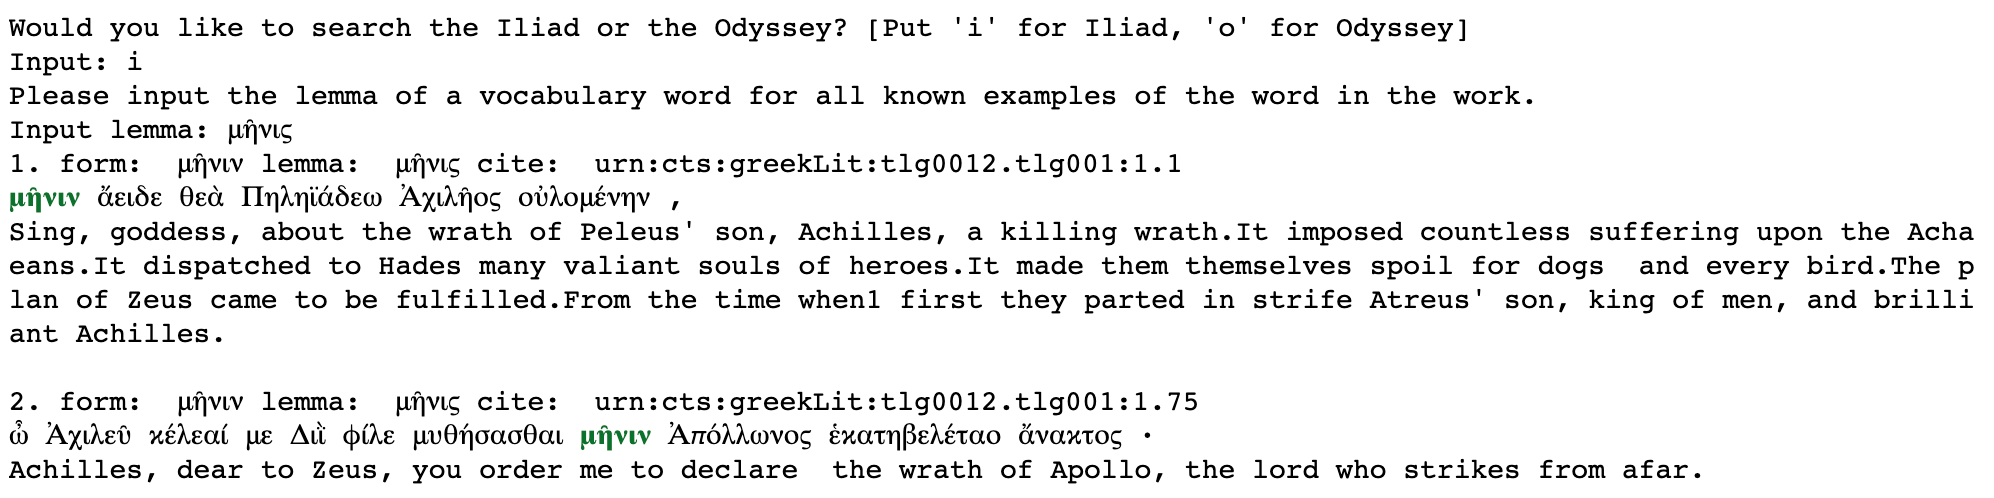

In [80]:
import xml.etree.ElementTree as ET
import os

ILIAD      = "tlg0012.tlg001.perseus-grc1.tb.xml"
ODYSSEY    = "tlg0012.tlg002.perseus-grc1.tb.xml"

print("Would you like to search the Iliad or the Odyssey? [Put 'i' for Iliad, 'o' for Odyssey]")

FILENAME = ''
while (FILENAME == ''):
    work = input("Input: ")
    if (work == 'i' or work == 'I' or work == '1' or work == 'Il' or work == 'Iliad'):
        FILENAME = ILIAD
        il_od = 'i'
    elif (work == 'o' or work == 'O' or work == '2' or work == 'Od' or work == "Odyssey"):
        FILENAME = ODYSSEY
        il_od = 'o'
    else:
        print("Your input cannot be recognized! Try ['i' for Iliad or 'o' for Odyssey].")

LOCALPATH  = os.path.join(LOCALROOT, 'gAGDT', 'data', 'xml', FILENAME)

tree = ET.parse(LOCALPATH)
root = tree.getroot()

count = 1

print("Please input the lemma of a vocabulary word for all known examples of the word in the work.")
vocab = input("Input lemma: ")

for sentence in root.findall('.//sentence'):
    subdoc = sentence.get('subdoc')
    sentid = sentence.get('id')
    for word in sentence.findall('./word'):
        wordid = word.get('id')
        form = word.get('form')
        lemma = word.get('lemma')
        cite = word.get('cite')
        if (vocab == lemma):
            print(str(count) + ".", "form: ", form, "lemma: ", lemma, "cite: ", cite)
            printGrkSent(il_od, sentid, wordid)
            print('')
            printEngSent(il_od, sentid)
            print('')
            print('')
            count += 1

Would you like to search the Iliad or the Odyssey? [Put 'i' for Iliad, 'o' for Odyssey]
Input: i
Please input the lemma of a vocabulary word for all known examples of the word in the work.
Input lemma: μῆνις
1. form:  μῆνιν lemma:  μῆνις cite:  urn:cts:greekLit:tlg0012.tlg001:1.1
μῆνιν ἄειδε θεὰ Πηληϊάδεω Ἀχιλῆος οὐλομένην , 
Sing, goddess, about the wrath of Peleus' son, Achilles, a killing wrath.It imposed countless suffering upon the Achaeans.It dispatched to Hades many valiant souls of heroes.It made them themselves spoil for dogs  and every bird.The plan of Zeus came to be fulfilled.From the time when1 first they parted in strife Atreus' son, king of men, and brilliant Achilles.

2. form:  μῆνιν lemma:  μῆνις cite:  urn:cts:greekLit:tlg0012.tlg001:1.75
ὦ Ἀχιλεῦ κέλεαί με Διῒ φίλε μυθήσασθαι μῆνιν Ἀπόλλωνος ἑκατηβελέταο ἄνακτος · 
Achilles, dear to Zeus, you order me to declare  the wrath of Apollo, the lord who strikes from afar.

3. form:  μῆνιν lemma:  μῆνις cite:  urn:cts:greek

## Adjacency List & Network Creation

### Preposition Modified Verbs

This program examines the relationship between prepositions (specifically ὑπό) and verbs. This script returns the frequencies of which verbs tend to depend on ὑπό the most in an exportable `pandas` dataframe.

`MODLEMMA`, `MODIFIER`, and `TARGET` can be changed as needed. 

Currently, `MODLEMMA` (modifier lemma) is set to "ὑπό", `MODIFIER` is set to "preposition", and `TARGET` is set to "verb".

Sample Output:

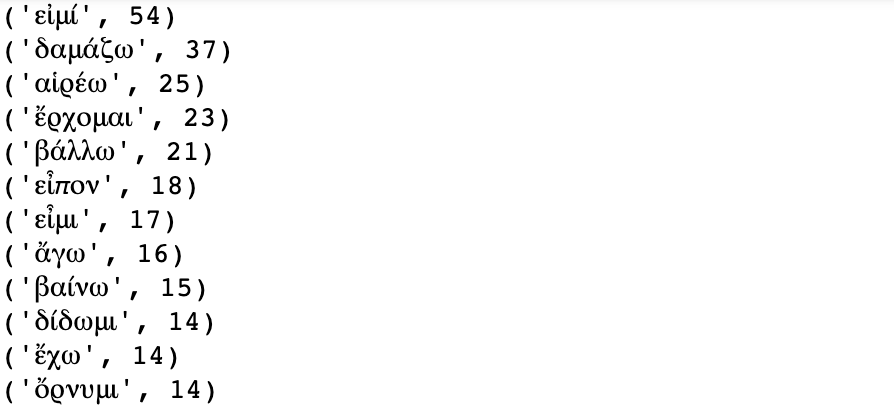

In [84]:
import xml.etree.ElementTree as ET
import pandas as pd

ILIAD = "tlg0012.tlg001.perseus-grc1.tb.xml"
ODYSSEY = "tlg0012.tlg001.perseus-grc1.tb.xml"
                                                           # change as needed 
LOCALPATH  = os.path.join(LOCALROOT, 'gAGDT', 'data', 'xml', ILIAD)

tree = ET.parse(LOCALPATH)
root = tree.getroot()

POS = {'noun': 'n','verb': 'v','participle': 't','adjective': 'a','adverb': 'd','article': 'l','particle': 'g',
       'conjunction': 'c','preposition': 'r','pronoun': 'p','numeral': 'm','interjection': 'i','exclamation': 'e',
       'punctuation': 'u','irregular': 'x'}

targid    = -10    #in case the code encounters a verb first
modhead   = -20    #in case the code encounters a prep first
targlemma = ''
moddict   = {}

# change as needed
MODLEMMA  = 'ὑπό'  
MODIFIER  = 'preposition'
TARGET    = 'verb'

for sentence in root.findall('.//sentence'):
    for word in sentence.findall('./word'):
        if 'postag' in word.attrib:
            postag = word.get('postag')
            pos = postag[0]

            if (pos == POS[MODIFIER]):
                modlem = word.get('lemma')
                if modlem == MODLEMMA:
                    modhead = word.get('head')
                    if targid == modhead:
                        objcount = moddict.get(targlemma)
                        if (objcount == None):
                            moddict.update({targlemma: 1})
                        else:
                            objcount += 1
                            moddict.update({targlemma: objcount})
            elif (pos == POS[TARGET]):
                targid    = word.get('id')
                targlemma = word.get('lemma')
                if targid == modhead:
                    objcount = moddict.get(targlemma)
                    if (objcount == None):
                        moddict.update({targlemma: 1})
                    else:
                        objcount += 1
                        moddict.update({targlemma: objcount})
    targid = -10    
    modhead = -20

sortedDict = sorted(moddict.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(sortedDict)
#df.to_csv('prepdeps.csv', index=False)

print(*sortedDict, sep = '\n')

('εἰμί', 54)
('δαμάζω', 37)
('αἱρέω', 25)
('ἔρχομαι', 23)
('βάλλω', 21)
('εἶπον', 18)
('εἶμι', 17)
('ἄγω', 16)
('βαίνω', 15)
('δίδωμι', 14)
('ἔχω', 14)
('ὄρνυμι', 14)
('φεύγω', 14)
('εἶδον', 13)
('λύω', 13)
('τίθημι', 13)
('γίγνομαι', 12)
('ἵστημι', 12)
('μάχομαι', 12)
('πείθω', 11)
('τίκτω', 11)
('λείπω', 10)
('πίπτω', 9)
('οἶδα', 8)
('φέρω', 8)
('προσαυδάω', 8)
('ἐλαύνω', 8)
('λαμβάνω', 7)
('μένω', 7)
('ὄλλυμι', 7)
('ἱκνέομαι', 6)
('κελεύω', 6)
('ἕπομαι', 6)
('τελέω', 6)
('ἵημι', 6)
('ἄρχω', 6)
('κεῖμαι', 6)
('ἐρύω1', 5)
('δέω', 5)
('νύσσω', 5)
('ἐξεναρίζω', 5)
('εὔχομαι', 5)
('τύπτω', 5)
('τείρω', 5)
('ἧμαι', 5)
('φημί', 5)
('ἄνωγα', 5)
('εἴκω1', 5)
('χωρέω', 5)
('χολόω', 5)
('καλύπτω', 5)
('ἀείρω', 5)
('πρόσφημι', 5)
('ἀνάσσω', 4)
('ἱκάνω', 4)
('πάσχω', 4)
('λάμπω', 4)
('οὐτάω', 4)
('τέμνω', 4)
('λίσσομαι', 4)
('ἔλπω', 4)
('φορέω', 4)
('κλονέω', 4)
('οἴχομαι', 4)
('φαίνω', 4)
('νικάω', 4)
('φοβέω', 4)
('μάρναμαι', 4)
('ἐθέλω', 4)
('ἀμείβω', 4)
('δείδω', 4)
('φωνέω', 4)
('ἀπόλλυμι',

### Prepositions with Accusative Objects

This program examines the relationship between prepositions (specifically ὑπό) and objects (specifically accusative). It returns the frequencies of which objects show up in relation to ὑπό in an exportable `pandas` dataframe. It also accounts for prepositions that have no dependent objects.

`TARGET`, `TARGLEMMA`, and `MODCASE` can be changed as needed. 

Currently, `TARGET` (modifier lemma) is set to "preposition", `TARGLEMMA` (target lemma) is set to "ὑπό", and `MODCASE` (modifier case) is set to "accusative".

Sample Output:

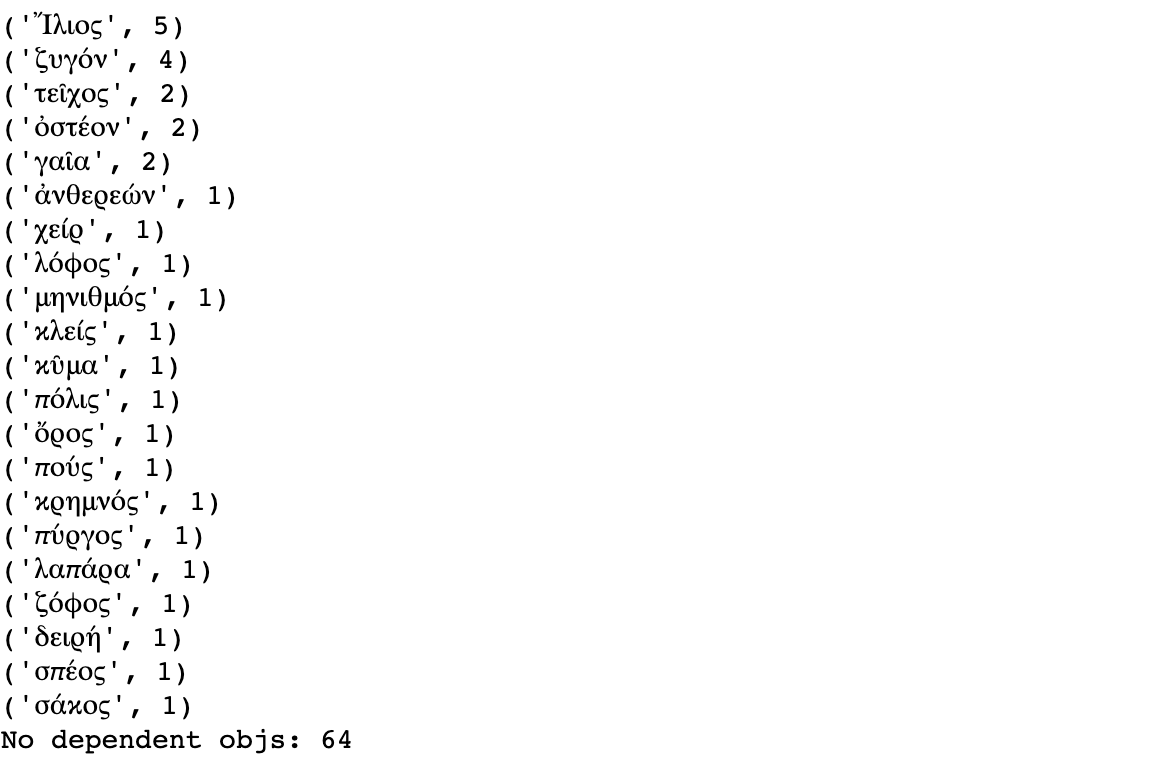

In [93]:
import xml.etree.ElementTree as ET
import pandas as pd

# change FILENAME to local path
ILIAD   = "tlg0012.tlg001.perseus-grc1.tb.xml"
ODYSSEY = "tlg0012.tlg001.perseus-grc1.tb.xml"
                                                           # change as needed 
LOCALPATH = os.path.join(LOCALROOT, 'gAGDT', 'data', 'xml', ILIAD)
tree      = ET.parse(LOCALPATH)
root      = tree.getroot()

POS   = {'noun': 'n','verb': 'v','participle': 't','adjective': 'a','adverb': 'd','article': 'l','particle': 'g',
         'conjunction': 'c','preposition': 'r','pronoun': 'p','numeral': 'm','interjection': 'i','exclamation': 'e',
         'punctuation': 'u','irregular': 'x'}

cases = {'nominative':'n', 'locative':'l','vocative':'v','genitive':'g','dative':'d',
         'accusative':'a','uncertain':'x'}

targid   = -10   # in case the code encounters a prep first
modhead  = -20   # in case the code encounters a noun first

# change as needed
TARGET = 'preposition'
TARGLEMMA = 'ὑπό'         
MODCASE = 'accusative'

targdict  = {}
modlemma  = ''
nodeps    = 0

for sentence in root.findall('.//sentence'):
    targcount = 0
    matchlist = []
    for word in sentence.findall('./word'):
        if 'postag' in word.attrib:
            postag = word.get('postag')
            pos    = postag[0]
            if (pos == POS[TARGET]):
                targlem = word.get('lemma')
                if targlem == TARGLEMMA:
                    targid = word.get('id')
                    targcount += 1

                    if targid == modhead:
                        matchlist.append('T')
                        if case == MODCASE:
                            targcount = targdict.get(targlem)
                            if (targcount == None):
                                targdict.update({modlemma: 1})
                            else:
                                targcount += 1
                                targdict.update({modlemma: modcount})
                            #print(word.attrib)
                            #print(count) #counts query results
                            #count+=1
                    else:
                        matchlist.append('F')
                #print(word.attrib)

            else: 
                modhead  = word.get('head')
                modlemma = word.get('lemma')
                case     = postag[7]
                if targid == modhead:
                    matchlist.append('T')
                    if case == cases[MODCASE]:
                        modcount = targdict.get(modlemma)
                        if (modcount == None):
                            targdict.update({modlemma: 1})
                        else:
                            modcount += 1
                            targdict.update({modlemma: modcount})
                else:
                    matchlist.append('F')

    numtargs = matchlist.count('T')
    if (numtargs != targcount):
        extra  = abs(numtargs - targcount)
        nodeps += extra
    targid  = -10
    modhead = -20

sortedDict = sorted(targdict.items(), key=lambda x: x[1], reverse=True)

df = pd.DataFrame(sortedDict)
#df.to_csv('prepobjs.csv', index=False)

print(*sortedDict, sep = '\n')
print("No dependent objs:", nodeps)

('Ἴλιος', 5)
('ζυγόν', 4)
('τεῖχος', 2)
('ὀστέον', 2)
('γαῖα', 2)
('ἀνθερεών', 1)
('χείρ', 1)
('λόφος', 1)
('μηνιθμός', 1)
('κλείς', 1)
('κῦμα', 1)
('πόλις', 1)
('ὄρος', 1)
('πούς', 1)
('κρημνός', 1)
('πύργος', 1)
('λαπάρα', 1)
('ζόφος', 1)
('δειρή', 1)
('σπέος', 1)
('σάκος', 1)
No dependent objs: 64


### Preposition Object Network

Using the `networkx` package, I created a directed weighted graph representing how prepositions are related to their objects in sentences. This network is represented using an adjacency list, which is converted to a `pandas` dataframe to simplify exporting.

Sample Output:

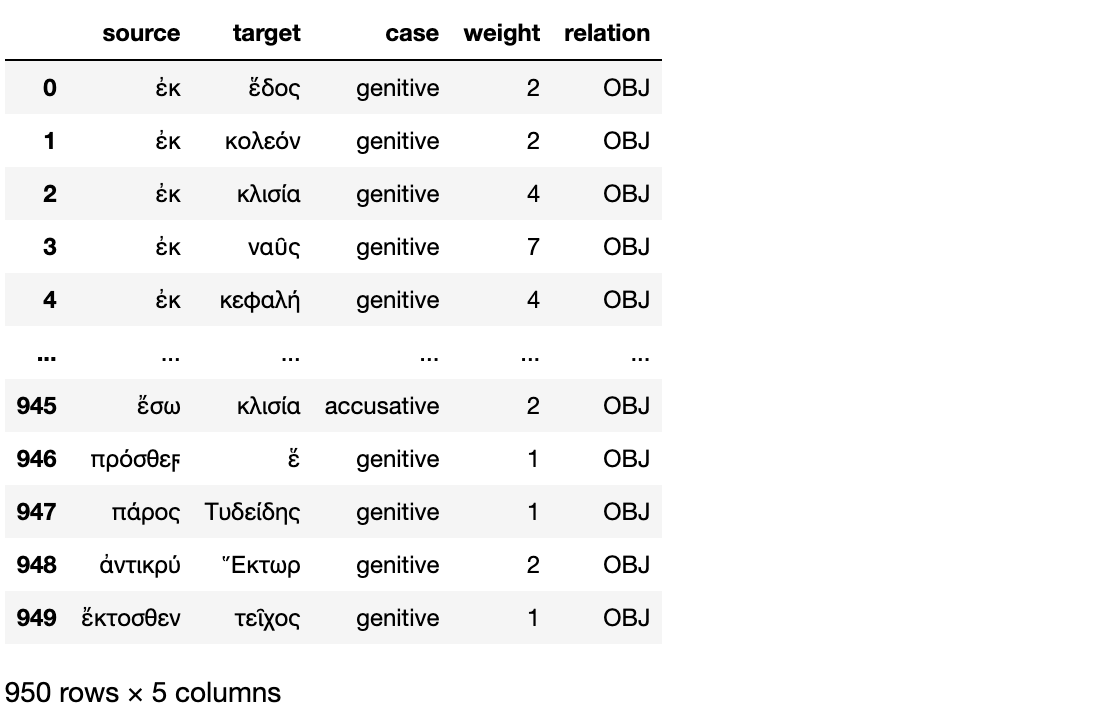

In [79]:
import xml.etree.ElementTree as ET
import networkx as nx
import os

# change FILENAME to local path
ILIAD   = "tlg0012.tlg001.perseus-grc1.tb.xml"
ODYSSEY = "tlg0012.tlg001.perseus-grc1.tb.xml"

LOCALPATH  = os.path.join(LOCALROOT, 'gAGDT', 'data', 'xml', ILIAD)
tree = ET.parse(LOCALPATH)
root = tree.getroot()

POS   = {'n': 'noun','v': 'verb','t': 'participle','a': 'adjective','d': 'adverb','l': 'article','g': 'particle',
         'c': 'conjunction','r': 'preposition','p': 'pronoun','m': 'numeral','i': 'interjection','e': 'exclamation',
         'u': 'punctuation','x': 'irregular'}

cases = {'n':'nominative', 'l':'locative','v':'vocative','g':'genitive','d':'dative',
         'a':'accusative','x':'uncertain', '-':'N/A'}

G = nx.DiGraph()

targRelation = 'OBJ'
prepid     = -10
preplemma  = -20
attribhead = -30

for sentence in root.findall(".//sentence"):
    for word in sentence.findall("./word"):
        if ('postag' in word.attrib):
            postag = word.get('postag')
            pos = postag[0]
            if (pos == 'r'):
                prepid    = word.get('id')
                preplemma = word.get('lemma')
                G.add_node(preplemma, pos = 'preposition')
                if (attribhead == prepid):
                    if (attribrelation == targRelation):
                        if G.has_edge(preplemma, attriblemma):
                            G[preplemma][attriblemma]['weight'] += 1
                        else:
                            G.add_edge(preplemma, attriblemma, relation = attribrelation, case = cases[attribcase], weight = 1)
            else:
                attribrelation = word.get('relation')
                attribhead     = word.get('head')
                attriblemma    = word.get('lemma')
                attribcase     = postag[7]
                if (attribhead == prepid):
                    if (attribrelation == targRelation):
                        G.add_node(attriblemma, pos = POS[pos], connectedWith = preplemma)
                        if G.has_edge(preplemma, attriblemma):
                            G[preplemma][attriblemma]['weight'] += 1
                        else:
                            G.add_edge(preplemma, attriblemma, relation = attribrelation, case = cases[attribcase], weight = 1)
    prepid     = -10
    preplemma  = -20
    attribhead = -30

df = nx.to_pandas_edgelist(G)
df
#nx.write_graphml(G, "prepRelationNetwork.graphml")
#nx.draw(G)

source    target        case  weight relation
0          ἐκ      ἕδος    genitive       2      OBJ
1          ἐκ    κολεόν    genitive       2      OBJ
2          ἐκ    κλισία    genitive       4      OBJ
3          ἐκ      ναῦς    genitive       7      OBJ
4          ἐκ    κεφαλή    genitive       4      OBJ
..        ...       ...         ...     ...      ...
945       ἔσω    κλισία  accusative       2      OBJ
946   πρόσθεϝ         ἕ    genitive       1      OBJ
947     πάρος  Τυδείδης    genitive       1      OBJ
948   ἀντικρύ     Ἕκτωρ    genitive       2      OBJ
949  ἔκτοσθεν    τεῖχος    genitive       1      OBJ

[950 rows x 5 columns]

#### Preposition Network Visualization with MatPlotLib

Using `matplotlib`, I generated a general visualization of this previous graph. As we can see, this is a static image that does not allow for much customization, but it nonetheless gives a rough visualization for the data.

Sample Output:

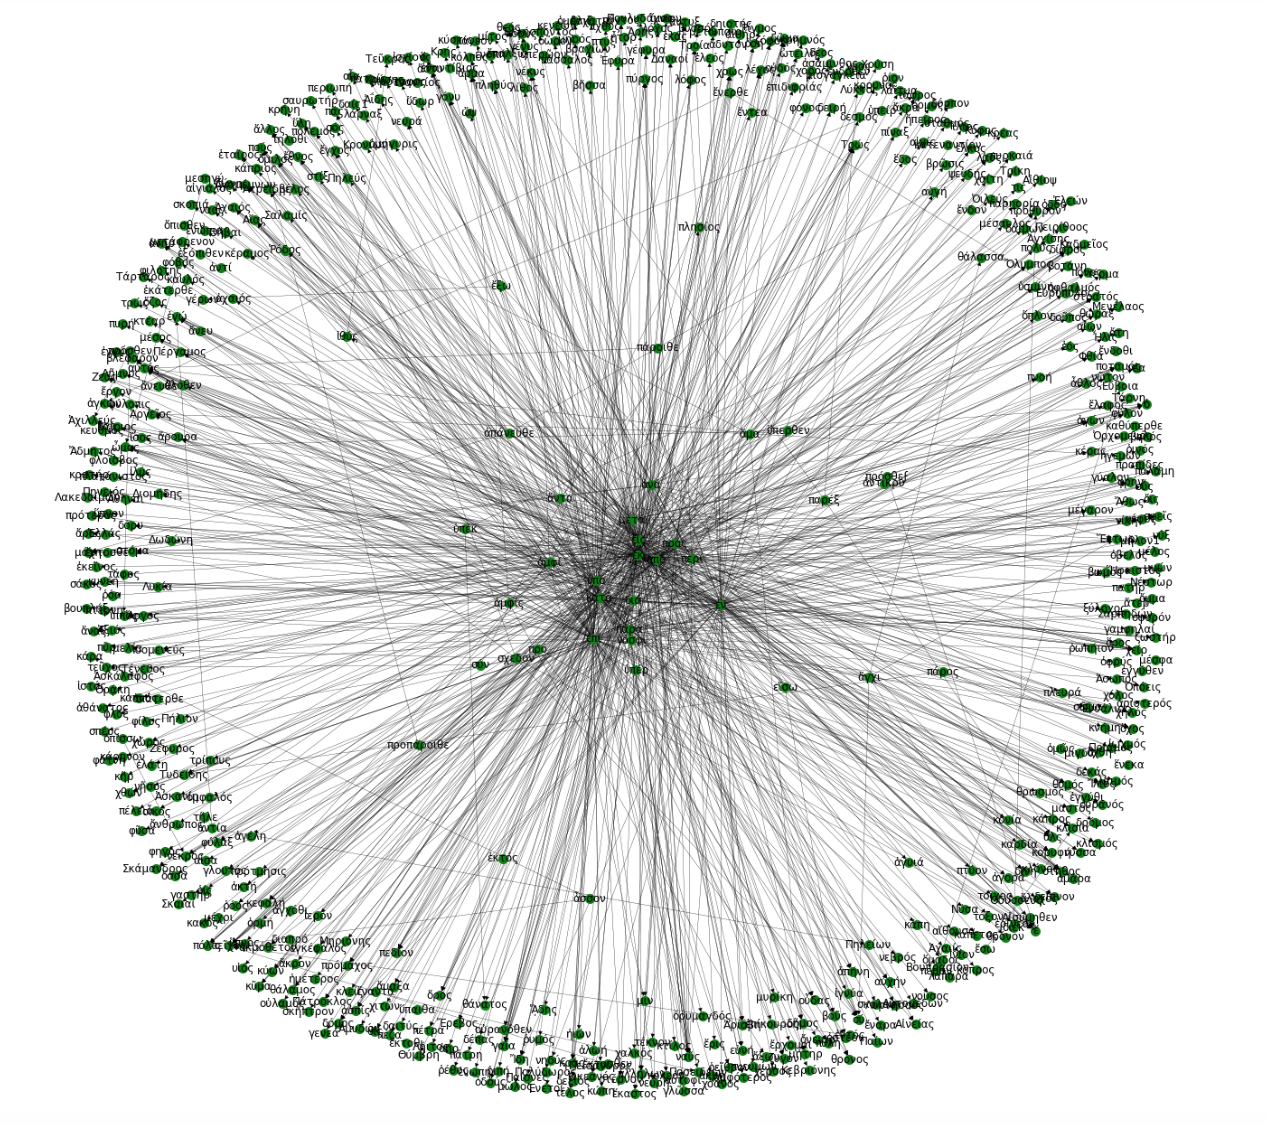

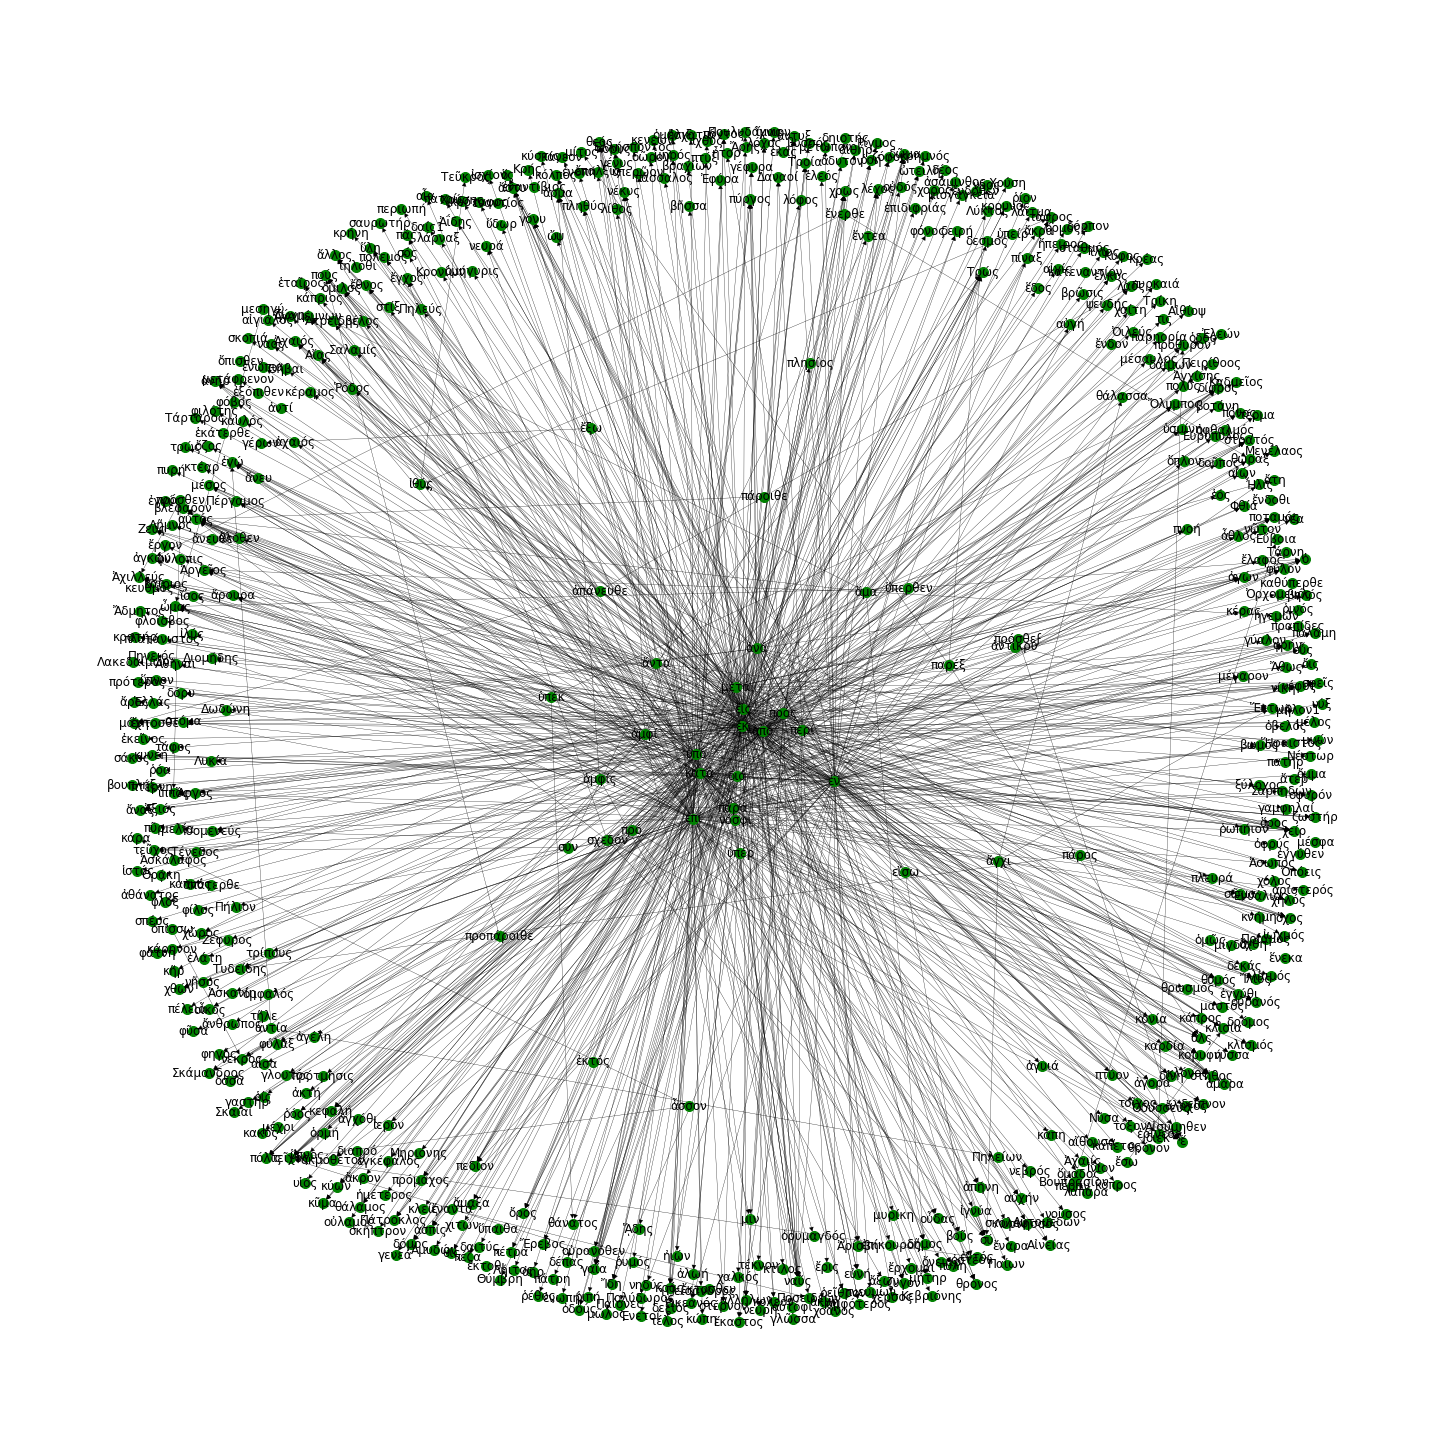

In [84]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,20))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels = True, width=0.3, 
        node_color='green', node_size=100)

#### Preposition Network Visualization with Bokeh

Using `bokeh`, I generated an interactive visualization of the Preposition Object graph.
The 'degree' that shows up in the tooltip refers to the 'weighted degree', meaning that the weighted edges are taken into account when calculating total degree.

In [68]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap

In [81]:
# we need this line for the graph to show up in the viewer
output_notebook()

# calculate degrees (aka how many edges each node has)
degrees = dict(G.degree(weight='weight'))
nx.set_node_attributes(G, name='degree', values=degrees)

# we adjust the node size to apply a color scheme to the graph
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in nx.degree(G)])
nx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

# choose colors for node and edge highlighting
node_highlight_color = 'white'
edge_highlight_color = 'black'

# choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

# pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Reds8

# choose a title!
title = 'Prep Obj Network (weighted degree)'

# establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
    ("Lemma", "@index"),
    ("POS", "@pos"),
    ("Degree", "@degree")
]

# create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

# create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html\
network_graph = from_networkx(G, nx.spring_layout, scale=10, center=(0, 0))

# set node sizes and colors according to node degree (color as spectrum of color palette)
minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))

# set node highlight colors
network_graph.node_renderer.hover_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)
network_graph.node_renderer.selection_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)

# set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.3, line_width=1)

# set edge highlight colors
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

# highlight nodes and edges
network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)

# add labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7)
plot.renderers.append(labels)

show(plot)
# save(plot, filename=f"{title}.html")

Loading BokehJS ...

The following script generates a graph that looks at the relation between prepositions and the CASES of the objects they modify.

In [91]:
import xml.etree.ElementTree as ET
import networkx as nx
import os

# change FILENAME to local path
ILIAD   = "tlg0012.tlg001.perseus-grc1.tb.xml"
ODYSSEY = "tlg0012.tlg001.perseus-grc1.tb.xml"

LOCALPATH  = os.path.join(LOCALROOT, 'gAGDT', 'data', 'xml', ILIAD)
tree = ET.parse(LOCALPATH)
root = tree.getroot()

POS   = {'n': 'noun','v': 'verb','t': 'participle','a': 'adjective','d': 'adverb','l': 'article','g': 'particle',
         'c': 'conjunction','r': 'preposition','p': 'pronoun','m': 'numeral','i': 'interjection','e': 'exclamation',
         'u': 'punctuation','x': 'irregular'}

cases = {'n':'nominative', 'l':'locative','v':'vocative','g':'genitive','d':'dative',
         'a':'accusative','x':'uncertain', '-':'N/A'}

G = nx.DiGraph()

targRelation = 'OBJ'
prepid     = -10
preplemma  = -20
attribhead = -30

for sentence in root.findall(".//sentence"):
    for word in sentence.findall("./word"):
        if ('postag' in word.attrib):
            postag = word.get('postag')
            pos = postag[0]
            if (pos == 'r'):
                prepid    = word.get('id')
                preplemma = word.get('lemma')
                G.add_node(preplemma, pos = 'preposition')
                if (attribhead == prepid):
                    if (attribrelation == targRelation):
                        if G.has_edge(preplemma, attribcase):
                            G[preplemma][attribcase]['weight'] += 1
                        else:
                            G.add_edge(preplemma, attribcase, relation = attribrelation, weight = 1)
            else:
                attribrelation = word.get('relation')
                attribhead     = word.get('head')
                attribcase     = cases[postag[7]]
                if (attribhead == prepid):
                    if (attribrelation == targRelation):
                        G.add_node(attribcase, pos = POS[pos], connectedWith = preplemma)
                        if G.has_edge(preplemma, attribcase):
                            G[preplemma][attribcase]['weight'] += 1
                        else:
                            G.add_edge(preplemma, attribcase, relation = attribrelation, weight = 1)
    prepid     = -10
    preplemma  = -20
    attribhead = -30

df = nx.to_pandas_edgelist(G)
df
#nx.write_graphml(G, "prepRelationNetwork.graphml")
#nx.draw(G)

source      target  weight relation
0         ἐκ    genitive     269      OBJ
1         ἐκ      dative       1      OBJ
2         ἐκ         N/A       5      OBJ
3        ἀνά  accusative      44      OBJ
4        ἀνά      dative       2      OBJ
..       ...         ...     ...      ...
77   πρόσθεϝ    genitive       1      OBJ
78   πλησίος    genitive       1      OBJ
79     πάρος    genitive       1      OBJ
80   ἀντικρύ    genitive       2      OBJ
81  ἔκτοσθεν    genitive       1      OBJ

[82 rows x 4 columns]

In [93]:
# we need this line for the graph to show up in the viewer
output_notebook()

# calculate degrees (aka how many edges each node has)
degrees = dict(G.degree(weight='weight'))
nx.set_node_attributes(G, name='degree', values=degrees)

# we adjust the node size to apply a color scheme to the graph
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in nx.degree(G)])
nx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

# choose colors for node and edge highlighting
node_highlight_color = 'white'
edge_highlight_color = 'black'

# choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

# pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Reds8

# choose a title!
title = 'Prep Obj Case Network (weighted degree)'

# establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
    ("Lemma", "@index"),
    ("POS", "@pos"),
    ("Degree", "@degree")
]

# create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

# create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html\
network_graph = from_networkx(G, nx.spring_layout, scale=10, center=(0, 0))

# set node sizes and colors according to node degree (color as spectrum of color palette)
minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))

# set node highlight colors
network_graph.node_renderer.hover_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)
network_graph.node_renderer.selection_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)

# set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.3, line_width=1)

# set edge highlight colors
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

# highlight nodes and edges
network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)

# add labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7)
plot.renderers.append(labels)

show(plot)
# save(plot, filename=f"{title}.html")

Loading BokehJS ...